In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import chardet

# Настройки отображения
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')

In [ ]:
# Загрузка файла на Google Colab
from google.colab import files
uploaded = files.upload()

# Определение имени файла
file_name = list(uploaded.keys())[0]
print(f"Загружен файл: {file_name}")

Saving superstore_final_dataset (1).csv to superstore_final_dataset (1) (2).csv
Загружен файл: superstore_final_dataset (1) (2).csv


In [ ]:
df = pd.read_csv(f'/content/{file_name}', encoding = "ISO-8859-1")

In [ ]:
def basic_data_overview(df):
    print("ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ")

    print(f"Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
    display(df.head())

    print("\nИнформация о типах данных:")
    print(df.info())

    print("\nСтатистика числовых колонок:")
    display(df.describe())

    print("\nСтатистика текстовых колонок:")
    text_columns = df.select_dtypes(include=['object']).columns
    for col in text_columns:
        print(f"\n{col}:")
        print(f"   Уникальных значений: {df[col].nunique()}")
        print(f"   Топ-5 значений: {df[col].value_counts().head().to_dict()}")

# Запуск первичного анализа
basic_data_overview(df)

ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ
Размер данных: 9800 строк, 18 столбцов


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680



Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000



Статистика текстовых колонок:

Order_ID:
   Уникальных значений: 4922
   Топ-5 значений: {'CA-2018-100111': 14, 'CA-2018-157987': 12, 'US-2017-108504': 11, 'CA-2017-165330': 11, 'US-2016-126977': 10}

Order_Date:
   Уникальных значений: 1230
   Топ-5 значений: {'5/9/2017': 38, '10/11/2017': 35, '1/12/2018': 34, '2/12/2018': 34, '9/12/2018': 33}

Ship_Date:
   Уникальных значений: 1326
   Топ-5 значений: {'26/09/2018': 34, '6/12/2018': 32, '16/12/2016': 31, '15/09/2018': 30, '12/12/2018': 30}

Ship_Mode:
   Уникальных значений: 4
   Топ-5 значений: {'Standard Class': 5859, 'Second Class': 1902, 'First Class': 1501, 'Same Day': 538}

Customer_ID:
   Уникальных значений: 793
   Топ-5 значений: {'WB-21850': 35, 'MA-17560': 34, 'PP-18955': 34, 'JL-15835': 33, 'JD-15895': 32}

Customer_Name:
   Уникальных значений: 793
   Топ-5 значений: {'William Brown': 35, 'Matt Abelman': 34, 'Paul Prost': 34, 'John Lee': 33, 'Jonathan Doherty': 32}

Segment:
   Уникальных значений: 3
   Топ-5 значений: 

Датасет содержит информацию о продажах товаров из супермаркета. Включает 9800 записей записей с детализацией по каждому заказу. Датасет содержит 9800 строк и 18 столбцов и охватывает продажи за период с 2015 по 2018 год в разных штатах США. Товары разделены на три основные категории: мебель, офисные принадлежности и технологические товары. Каждая запись соответствует одному товару в заказе, поэтому один заказ может содержать несколько строк.

Основные столбцы данных:
* Row_ID — уникальный идентификатор строки
* Order_ID — идентификатор заказа
* Order_Date — дата оформления заказа
* Ship_Date — дата доставки заказа
* Ship_Mode — способ доставки (Second Class, Standard Class, First Class, Same Day)
* Customer_ID — идентификатор клиента
* Customer_Name — имя клиента
* Segment — сегмент клиента (Consumer, Corporate, Home Office)
* Country — страна (все записи относятся к United States)
* City, State, Postal_Code — географические данные клиента
* Region — регион (South, West, Central, East)
* Product_ID — идентификатор товара
* Category — категория товара (Furniture, Office Supplies, Technology)
* Sub_Category — подкатегория товара (например, Bookcases, Chairs, Phones, Binders)
* Product_Name — название товара.  
* Sales — сумма продажи в долларах.  


In [ ]:
def data_quality_check(df):
    print("АНАЛИЗ КАЧЕСТВА ДАННЫХ")

    print("ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100

    missing_df = pd.DataFrame({
        'Количество пропусков': missing_data,
        'Процент пропусков': missing_percent.round(2)
    })

    missing_data_exists = missing_df[missing_df['Количество пропусков'] > 0]
    if len(missing_data_exists) > 0:
        display(missing_data_exists)
    else:
        print("Пропущенных значений нет!")

    print("\nДУБЛИКАТЫ:")
    duplicates = df.duplicated().sum()
    print(f"Полных дубликатов: {duplicates}")

    if duplicates > 0:
        print("Внимание: обнаружены дубликаты!")
        display(df[df.duplicated()].head())
    else:
        print("Дубликатов нет!")

    # Проверка уникальности ID заказов
    print(f"\nУникальность Order_ID: {df['Order_ID'].nunique()} из {len(df)}")

    return missing_df

# Запуск проверки качества
missing_info = data_quality_check(df)

АНАЛИЗ КАЧЕСТВА ДАННЫХ
ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:


,Количество пропусков,Процент пропусков
Postal_Code,11,0.11



ДУБЛИКАТЫ:
Полных дубликатов: 0
Дубликатов нет!

Уникальность Order_ID: 4922 из 9800


In [ ]:
def preprocess_data(df):
    print("ПРЕДОБРАБОТКА ДАННЫХ")

    # Создание копии
    df_processed = df.copy()

    # Преобразование дат
    print("Преобразование дат")
    df_processed['Order_Date'] = pd.to_datetime(df_processed['Order_Date'], format='%d/%m/%Y')
    df_processed['Ship_Date'] = pd.to_datetime(df_processed['Ship_Date'], format='%d/%m/%Y')

    # Добавление новых временных признаков
    df_processed['Order_Year'] = df_processed['Order_Date'].dt.year
    df_processed['Order_Month'] = df_processed['Order_Date'].dt.month
    df_processed['Order_Quarter'] = df_processed['Order_Date'].dt.quarter
    df_processed['Order_DayOfWeek'] = df_processed['Order_Date'].dt.day_name()
    df_processed['Shipping_Days'] = (df_processed['Ship_Date'] - df_processed['Order_Date']).dt.days

    print(f"Диапазон дат: {df_processed['Order_Date'].min().strftime('%Y-%m-%d')} - {df_processed['Order_Date'].max().strftime('%Y-%m-%d')}")
    print(f"Среднее время доставки: {df_processed['Shipping_Days'].mean():.1f} дней")

    # Проверка отрицательного времени доставки
    negative_shipping = df_processed[df_processed['Shipping_Days'] < 0]
    if len(negative_shipping) > 0:
        print(f"Обнаружены {len(negative_shipping)} заказов с отрицательным временем доставки")

    return df_processed

# Запуск предобработки
df_clean = preprocess_data(df)
print("\nПроверка новых колонок:")
print(df_clean[['Order_Date', 'Ship_Date', 'Order_Year', 'Order_Month', 'Shipping_Days']].head())

ПРЕДОБРАБОТКА ДАННЫХ
Преобразование дат
Диапазон дат: 2015-01-03 - 2018-12-30
Среднее время доставки: 4.0 дней

Проверка новых колонок:
  Order_Date  Ship_Date  Order_Year  Order_Month  Shipping_Days
0 2017-11-08 2017-11-11        2017           11              3
1 2017-11-08 2017-11-11        2017           11              3
2 2017-06-12 2017-06-16        2017            6              4
3 2016-10-11 2016-10-18        2016           10              7
4 2016-10-11 2016-10-18        2016           10              7


In [ ]:
def analyze_categories(df):
    print("АНАЛИЗ ПРОДАЖ ПО КАТЕГОРИЯМ")

    # Анализ основных категорий
    category_analysis = df.groupby('Category').agg({
        'Sales': ['sum', 'mean', 'count'],
        'Product_ID': 'nunique'
    }).round(2)

    category_analysis.columns = ['Общие продажи', 'Средний чек', 'Количество заказов', 'Уникальных товаров']
    category_analysis['Доля в продажах (%)'] = (category_analysis['Общие продажи'] / category_analysis['Общие продажи'].sum() * 100).round(2)

    print("ОСНОВНЫЕ КАТЕГОРИИ:")
    display(category_analysis)

    # Анализ по подкатегориям
    subcategory_analysis = df.groupby(['Category', 'Sub_Category']).agg({
        'Sales': ['sum', 'mean', 'count']
    }).round(2)

    subcategory_analysis.columns = ['Общие продажи', 'Средний чек', 'Количество заказов']
    subcategory_analysis = subcategory_analysis.sort_values('Общие продажи', ascending=False)

    print("\nТОП-10 ПОДКАТЕГОРИЙ:")
    display(subcategory_analysis.head(10))

    return category_analysis, subcategory_analysis

# Запуск анализа категорий
category_sales, subcategory_sales = analyze_categories(df_clean)

АНАЛИЗ ПРОДАЖ ПО КАТЕГОРИЯМ
ОСНОВНЫЕ КАТЕГОРИИ:


,Общие продажи,Средний чек,Количество заказов,Уникальных товаров,Доля в продажах (%)
Category,,,,,
Furniture,728658.58,350.65,2078,375,32.22
Office Supplies,705422.33,119.38,5909,1082,31.19
Technology,827455.87,456.40,1813,404,36.59



ТОП-10 ПОДКАТЕГОРИЙ:


Общие продажи  Средний чек  Количество заказов
Category        Sub_Category                                                
Technology      Phones            327782.45       374.18                 876
Furniture       Chairs            322822.73       531.83                 607
Office Supplies Storage           219343.39       263.63                 832
Furniture       Tables            202810.63       645.89                 314
Office Supplies Binders           200028.78       134.07                1492
Technology      Machines          189238.63      1645.55                 115
                Accessories       164186.70       217.18                 756
                Copiers           146248.09      2215.88                  66
Furniture       Bookcases         113813.20       503.60                 226
Office Supplies Appliances        104618.40       227.93                 459

Ключевые статистические показатели:

Продажи (Sales):
* Средний чек: $230.77

* Стандартное отклонение: $626.65 (высокая вариативность)

* Минимальная продажа: $0.44

* Максимальная продажа: $22,638.48
* 75% продаж составляют менее $210.61

Почтовые индексы (Postal_Code):
* 11 пропущенных значений (9789 из 9800)
* Диапазон: от 1040 до 99301


In [ ]:
def analyze_geography(df):
    print("ГЕОГРАФИЧЕСКИЙ АНАЛИЗ")

    # Анализ по регионам
    region_analysis = df.groupby('Region').agg({
        'Sales': ['sum', 'mean', 'count'],
        'Customer_ID': 'nunique'
    }).round(2)

    region_analysis.columns = ['Общие продажи', 'Средний чек', 'Количество заказов', 'Уникальных клиентов']
    region_analysis['Доля в продажах (%)'] = (region_analysis['Общие продажи'] / region_analysis['Общие продажи'].sum() * 100).round(2)

    print("ПРОДАЖИ ПО РЕГИОНАМ:")
    display(region_analysis)

    # Топ-10 штатов
    state_sales = df.groupby('State').agg({
        'Sales': 'sum',
        'Order_ID': 'nunique'
    }).round(2).sort_values('Sales', ascending=False).head(10)

    state_sales.columns = ['Общие продажи', 'Количество заказов']

    print("\nТОП-10 ШТАТОВ:")
    display(state_sales)

    # Топ-10 городов
    city_sales = df.groupby('City').agg({
        'Sales': 'sum',
        'Order_ID': 'nunique'
    }).round(2).sort_values('Sales', ascending=False).head(10)

    city_sales.columns = ['Общие продажи', 'Количество заказов']

    print("\nТОП-10 ГОРОДОВ:")
    display(city_sales)

    return region_analysis, state_sales, city_sales

# Запуск географического анализа
region_sales, top_states, top_cities = analyze_geography(df_clean)

ГЕОГРАФИЧЕСКИЙ АНАЛИЗ
ПРОДАЖИ ПО РЕГИОНАМ:


,Общие продажи,Средний чек,Количество заказов,Уникальных клиентов,Доля в продажах (%)
Region,,,,,
Central,492646.91,216.36,2277,626,21.78
East,669518.73,240.40,2785,669,29.60
South,389151.46,243.52,1598,509,17.21
West,710219.68,226.18,3140,681,31.40



ТОП-10 ШТАТОВ:


,Общие продажи,Количество заказов
State,,
California,446306.46,1002
New York,306361.15,547
Texas,168572.53,480
Washington,135206.85,254
Pennsylvania,116276.65,285
Florida,88436.53,197
Illinois,79236.52,270
Michigan,76136.07,116
Ohio,75130.35,227



ТОП-10 ГОРОДОВ:


,Общие продажи,Количество заказов
City,,
New York City,252462.55,439
Los Angeles,173420.18,378
Seattle,116106.32,210
San Francisco,109041.12,261
Philadelphia,108841.75,262
Houston,63956.14,186
Chicago,47820.13,166
San Diego,47521.03,88
Jacksonville,44713.18,61


from matplotlib import pyplot as plt
top_states['Общие продажи'].plot(kind='hist', bins=20, title='Общие продажи')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_states['Количество заказов'].plot(kind='hist', bins=20, title='Количество заказов')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_states.plot(kind='scatter', x='Общие продажи', y='Количество заказов', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_states['Общие продажи'].plot(kind='line', figsize=(8, 4), title='Общие продажи')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_states['Количество заказов'].plot(kind='line', figsize=(8, 4), title='Количество заказов')
plt.gca().spines[['top', 'right']].set_visible(False)

Региональные особенности:
* Западный регион - абсолютный лидер (31.4% продаж), но с низким средним чеком ($226)

* Восточный регион - второй по объему (29.6%), довольно высокий средний чек ($240)

* Южный регион - наименьший объем (17.2%), но самый высокий средний чек ($243)

* Центральный регион - стабильная середина (21.8%)

Топ штаты:
* Калифорния - безоговорочный лидер ($446 000), высокая частота заказов (1002)

* Нью-Йорк - второй ($306 000), но более крупные транзакции (меньше заказов при большом объеме)

* Техас - третий ($168 000), хорошая активность

Города-лидеры:
* Нью-Йорк и Лос-Анджелес - мегаполисы с огромным объемом

* Сиэтл - высокая эффективность (мало заказов, но большой объем)
* Детройт - экстремальная эффективность (всего 53 заказа на $42 000)

In [ ]:
def analyze_customers(df):
    print("АНАЛИЗ КЛИЕНТОВ")

    # Анализ по сегментам клиентов
    segment_analysis = df.groupby('Segment').agg({
        'Sales': ['sum', 'mean', 'count'],
        'Customer_ID': 'nunique',
        'Order_ID': 'nunique'
    }).round(2)

    segment_analysis.columns = ['Общие продажи', 'Средний чек', 'Количество позиций', 'Уникальных клиентов', 'Уникальных заказов']
    segment_analysis['Доля в продажах (%)'] = (segment_analysis['Общие продажи'] / segment_analysis['Общие продажи'].sum() * 100).round(2)

    print("АНАЛИЗ ПО СЕГМЕНТАМ КЛИЕНТОВ:")
    display(segment_analysis)

    # Топ-10 клиентов по продажам
    top_customers = df.groupby(['Customer_ID', 'Customer_Name']).agg({
        'Sales': 'sum',
        'Order_ID': 'nunique',
        'Order_Date': ['min', 'max']
    }).round(2)

    top_customers.columns = ['Общие продажи', 'Количество заказов', 'Первый заказ', 'Последний заказ']
    top_customers = top_customers.sort_values('Общие продажи', ascending=False).head(10)

    print("\nТОП-10 КЛИЕНТОВ:")
    display(top_customers)

    # Анализ активности клиентов
    customer_orders = df.groupby('Customer_ID')['Order_ID'].nunique()
    print(f"\nСТАТИСТИКА АКТИВНОСТИ КЛИЕНТОВ:")
    print(f"   • Среднее количество заказов на клиента: {customer_orders.mean():.2f}")
    print(f"   • Максимальное количество заказов: {customer_orders.max()}")
    print(f"   • Медианное количество заказов: {customer_orders.median()}")
    print(f"   • Всего уникальных клиентов: {df['Customer_ID'].nunique()}")

    return segment_analysis, top_customers

# Запуск анализа клиентов
segment_sales, top_customers = analyze_customers(df_clean)

АНАЛИЗ КЛИЕНТОВ
АНАЛИЗ ПО СЕГМЕНТАМ КЛИЕНТОВ:


,Общие продажи,Средний чек,Количество позиций,Уникальных клиентов,Уникальных заказов,Доля в продажах (%)
Segment,,,,,,
Consumer,1148060.53,225.07,5101,409,2537,50.76
Corporate,688494.07,233.15,2953,236,1491,30.44
Home Office,424982.18,243.40,1746,148,894,18.79



ТОП-10 КЛИЕНТОВ:


,,Общие продажи,Количество заказов,Первый заказ,Последний заказ
Customer_ID,Customer_Name,,,,
SM-20320,Sean Miller,25043.05,5,2015-03-18,2018-10-12
TC-20980,Tamara Chand,19052.22,5,2015-11-07,2017-11-26
RB-19360,Raymond Buch,15117.34,6,2017-04-01,2018-09-25
TA-21385,Tom Ashbrook,14595.62,4,2015-09-12,2018-10-22
AB-10105,Adrian Barton,14473.57,10,2015-12-20,2018-11-19
KL-16645,Ken Lonsdale,14175.23,12,2015-07-25,2018-11-13
SC-20095,Sanjit Chand,14142.33,9,2015-02-12,2018-01-15
HL-15040,Hunter Lopez,12873.30,6,2015-01-20,2018-11-17
SE-20110,Sanjit Engle,12209.44,11,2015-04-11,2018-12-21



СТАТИСТИКА АКТИВНОСТИ КЛИЕНТОВ:
   • Среднее количество заказов на клиента: 6.21
   • Максимальное количество заказов: 17
   • Медианное количество заказов: 6.0
   • Всего уникальных клиентов: 793


КЛИЕНТСКИЕ ВЫВОДЫ:
По сегментам:
* Consumer - основа бизнеса (50.8%), средний чек $225.07
* Corporate - стабильный (30.4%), средний чек $233.15
* Home Office - нишевый (18.8%), но самый высокий средний чек ($243)

Портрет клиента:
* Средняя частота заказов: 6.21 заказа за весь период (2015-2018)
* В пересчете на год: примерно 1.55 заказа в год на клиента
* Максимальная активность: 17 заказов за 4 года
* Медианная активность: 6 заказов за 4 года

Топ-клиенты:
* Sean Miller - VIP-клиент ($25K), долгосрочные отношения (3.5 года)

* Tamara Chand - крупные заказы ($19K), но менее активна
* Ken Lonsdale - самый активный (12 заказов), постоянный клиент
* Adrian Barton - частый покупатель (10 заказов)

In [ ]:
def analyze_temporal_trends(df):
    print("ВРЕМЕННОЙ АНАЛИЗ")

    # Продажи по годам
    yearly_sales = df.groupby('Order_Year').agg({
        'Sales': 'sum',
        'Order_ID': 'nunique',
        'Customer_ID': 'nunique'
    }).round(2)

    yearly_sales.columns = ['Общие продажи', 'Количество заказов', 'Уникальных клиентов']
    yearly_sales['Рост продаж (%)'] = (yearly_sales['Общие продажи'].pct_change() * 100).round(2)

    print("ПРОДАЖИ ПО ГОДАМ:")
    display(yearly_sales)

    # Продажи по месяцам
    monthly_sales = df.groupby(['Order_Year', 'Order_Month']).agg({
        'Sales': 'sum',
        'Order_ID': 'nunique'
    }).round(2)

    monthly_sales.columns = ['Общие продажи', 'Количество заказов']

    print("\nПРОДАЖИ ПО МЕСЯЦАМ (последние 12 месяцев):")
    display(monthly_sales.tail(12))

    # Продажи по дням недели
    weekday_sales = df.groupby('Order_DayOfWeek').agg({
        'Sales': 'sum',
        'Order_ID': 'nunique'
    }).round(2)

    weekday_sales.columns = ['Общие продажи', 'Количество заказов']

    # Упорядочивание дней недели
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_sales = weekday_sales.reindex(day_order)

    print("\nПРОДАЖИ ПО ДНЯМ НЕДЕЛИ:")
    display(weekday_sales)

    return yearly_sales, monthly_sales, weekday_sales

# Запуск временного анализа
yearly_sales, monthly_sales, weekday_sales = analyze_temporal_trends(df_clean)

ВРЕМЕННОЙ АНАЛИЗ
ПРОДАЖИ ПО ГОДАМ:


,Общие продажи,Количество заказов,Уникальных клиентов,Рост продаж (%)
Order_Year,,,,
2015,479856.21,947,589,NaN
2016,459436.01,1019,567,-4.26
2017,600192.55,1295,635,30.64
2018,722052.02,1661,690,20.30



ПРОДАЖИ ПО МЕСЯЦАМ (последние 12 месяцев):


Общие продажи  Количество заказов
Order_Year Order_Month                                   
2018       1                 43476.47                  67
           2                 19921.00                  52
           3                 58863.41                 117
           4                 35541.91                 115
           5                 43825.98                 116
           6                 48190.73                 129
           7                 44825.10                 108
           8                 62837.85                 109
           9                 86152.89                 222
           10                77448.13                 144
           11               117938.16                 259
           12                83030.39                 223


ПРОДАЖИ ПО ДНЯМ НЕДЕЛИ:


,Общие продажи,Количество заказов
Order_DayOfWeek,,
Monday,348791.55,799
Tuesday,420535.92,926
Wednesday,315888.97,635
Thursday,142839.24,262
Friday,234710.84,552
Saturday,420901.48,898
Sunday,377868.78,850


Динамика по годам
- 2015-2016: Незначительное снижение на 4.26% (период стагнации)
- 2017: Резкий рост на 30,64% - прорывной год
- 2018: Стабильный рост на 20,30% - закрепление успеха
- Общий тренд: Устойчивый рост с 2017 года

Клиентская база:
- Постоянный рост уникальных клиентов (изменение с 589 до 690 за 4 года)
- Увеличение количества заказов опережает рост клиентской базы

Динамика по месяцам (2018, т.к. охватывает все 12 месяцев без пропусков):
- Пиковые месяцы: Ноябрь ($117 938)   и  Сентябрь ($86 153)
- Сезонность: Ярко выраженный рост к концу года
- Самые слабые месяцы: Февраль ($19 921) и Апрель ($35 542)
- 2018: финал года содержит 45% от годовых продаж

Дневная активность:
- Вторник и Суббота - дни максимальной активности (оформлено заказов более, чем на $420 000)
- Понедельник - стабильный старт недели ($348 000)
- Четверг - аномально низкие продажи ($142 000) - требует исследования
- Выходные активны - розничные покупки преобладают



Вывод: бизнес показывает здоровый рост с выраженной сезонностью и устойчивыми недельными паттернами.

In [ ]:
def analyze_shipping(df):
    print("АНАЛИЗ ДОСТАВКИ")

    shipping_analysis = df.groupby('Ship_Mode').agg({
        'Sales': ['sum', 'mean', 'count'],
        'Shipping_Days': 'mean',
        'Order_ID': 'nunique'
    }).round(2)

    shipping_analysis.columns = ['Общие продажи', 'Средний чек', 'Количество позиций', 'Среднее время доставки', 'Уникальных заказов']
    shipping_analysis['Доля в продажах (%)'] = (shipping_analysis['Общие продажи'] / shipping_analysis['Общие продажи'].sum() * 100).round(2)

    print("АНАЛИЗ ПО СПОСОБАМ ДОСТАВКИ:")
    display(shipping_analysis)

    # Анализ времени доставки по регионам
    shipping_by_region = df.groupby(['Region', 'Ship_Mode']).agg({
        'Shipping_Days': 'mean',
        'Sales': 'sum'
    }).round(2)

    print("\nВРЕМЯ ДОСТАВКИ ПО РЕГИОНАМ:")
    display(shipping_by_region)

    return shipping_analysis

# Запуск анализа доставки
shipping_info = analyze_shipping(df_clean)

АНАЛИЗ ДОСТАВКИ
АНАЛИЗ ПО СПОСОБАМ ДОСТАВКИ:


,Общие продажи,Средний чек,Количество позиций,Среднее время доставки,Уникальных заказов,Доля в продажах (%)
Ship_Mode,,,,,,
First Class,345572.26,230.23,1501,2.18,772,15.28
Same Day,125219.04,232.75,538,0.04,261,5.54
Second Class,449914.18,236.55,1902,3.25,944,19.89
Standard Class,1340831.31,228.85,5859,5.01,2945,59.29



ВРЕМЯ ДОСТАВКИ ПО РЕГИОНАМ:


Shipping_Days      Sales
Region  Ship_Mode                               
Central First Class              2.31   58057.30
        Same Day                 0.03   20105.92
        Second Class             3.36   97605.71
        Standard Class           4.98  316877.98
East    First Class              2.21  110436.69
        Same Day                 0.00   43316.46
        Second Class             3.27  115108.26
        Standard Class           4.97  400657.31
South   First Class              2.12   49045.92
        Same Day                 0.01   21017.17
        Second Class             3.20   93434.54
        Standard Class           5.01  225653.83
West    First Class              2.10  128032.35
        Same Day                 0.10   40779.48
        Second Class             3.17  143765.67
        Standard Class           5.07  397642.18

Анализ доставки:
Standard Class - основа бизнеса (массовый, экономичный сегмент):
- 59.29% всех продаж
- Самый долгий срок доставки (5.01 дней)
- Самый низкий средний чек ($228.85)

Second Class - премиум-баланс (оптимальное соотношение цены и скорости):
- 19.89% продаж
- Высокий средний чек ($236.55)
- Умеренное время доставки (3.25 дней)

First Class - скоростной сегмент:
- 15.28% продаж
- Быстрая доставка (2.18 дней)
- Хороший средний чек ($230.23)

Same Day - экстренные заказы:
- Всего 5.54% продаж
- Мгновенная доставка (0.04 дня)
- Самый высокий средний чек ($232.75)




Географическая эффективность:

Западный регион - лидер эффективности:
- Лучшие показатели по First Class (2.10 дня)
- Высокие продажи во всех категориях доставки
- Оптимизированная логистика

Южный регион - скорость премиум:
- Самые быстрые First Class (2.12 дней)
- Хорошие показатели Same Day
- Вывод: Хорошая инфраструктура срочной доставки

Восточный регион - массовый сегмент:
- Максимальные продажи Standard Class ($400K)
- Высокая доля премиальной доставки
- Вывод: Развитый рынок с разными потребностями

Центральный регион - стабильный:
- Средние показатели по всем метрикам
- Сбалансированный спрос




Общий вывод: Компания успешно сегментировала услуги доставки, но имеет потенциал оптимизации в массовом сегменте и региональном выравнивании.

ВИЗУАЛИЗАЦИЯ


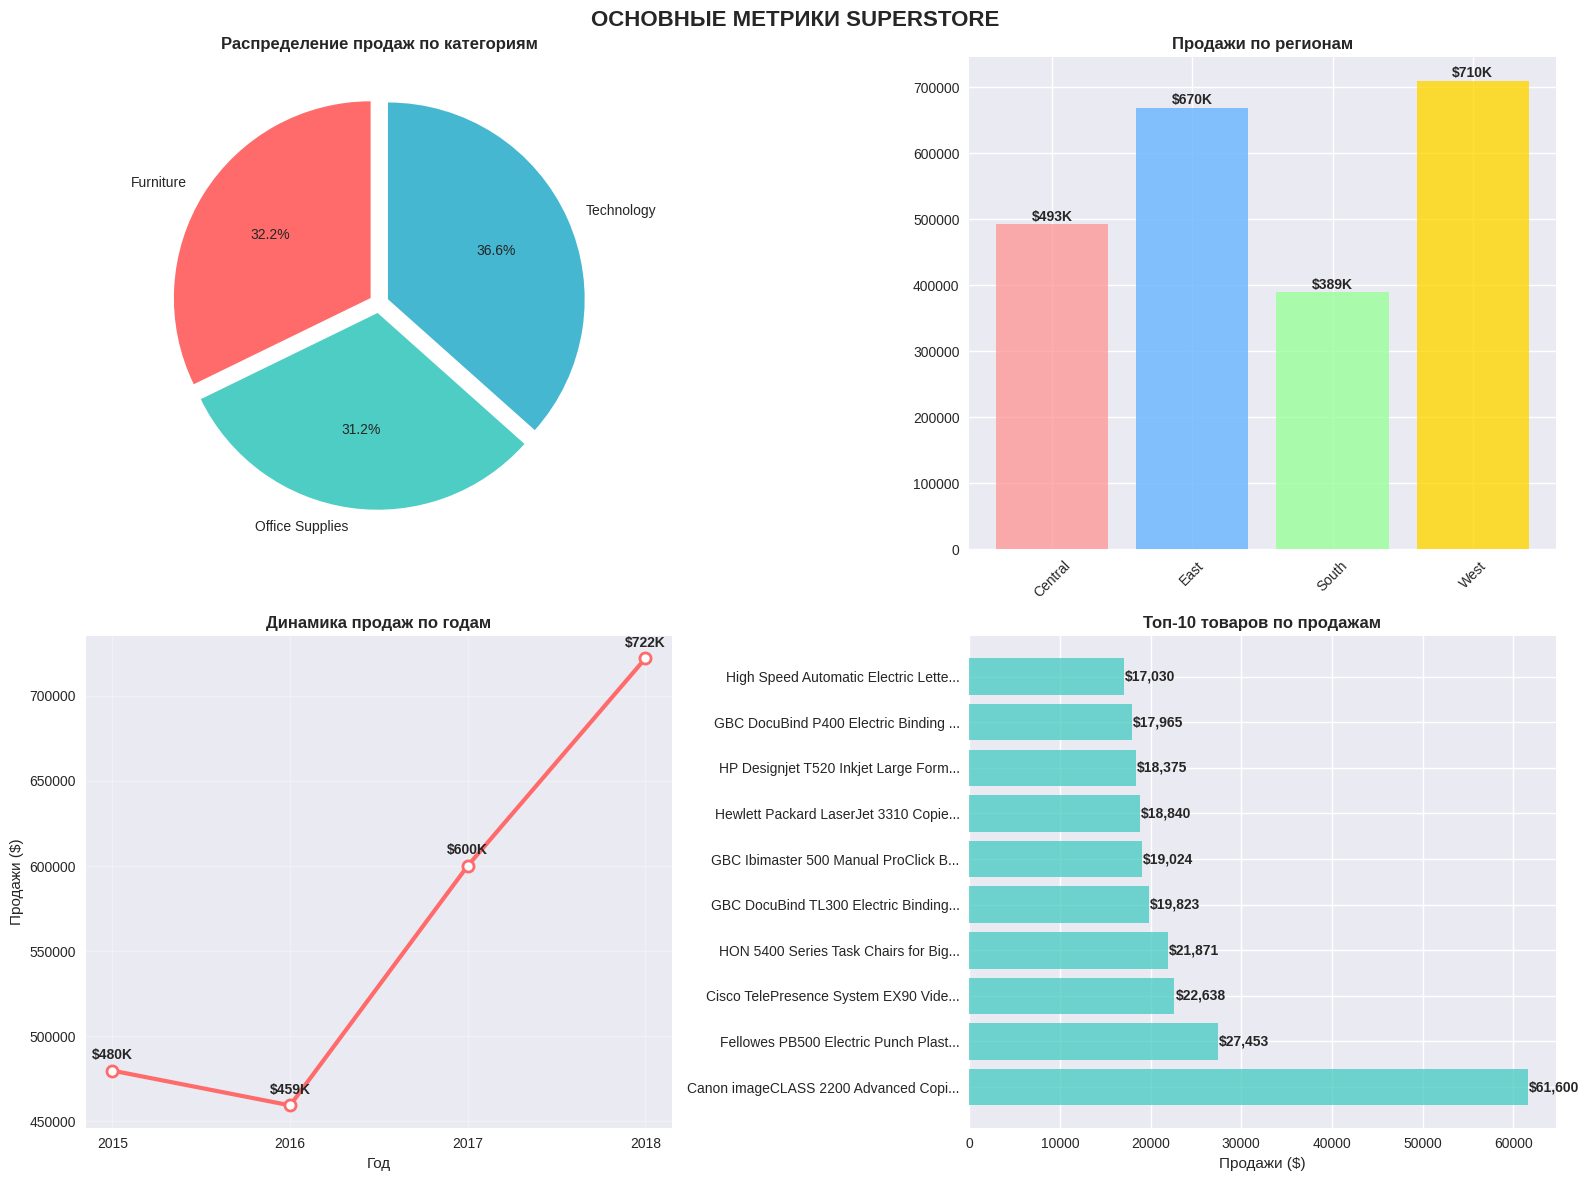

In [ ]:
def create_main_visualizations(df, category_sales, region_sales, yearly_sales):
    print("ВИЗУАЛИЗАЦИЯ")

    # Создание сетки графиков
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('ОСНОВНЫЕ МЕТРИКИ SUPERSTORE', fontsize=16, fontweight='bold')

    # Круговая диаграмма - продажи по категориям
    categories = category_sales.index
    sales_values = category_sales['Общие продажи']
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    axes[0, 0].pie(sales_values, labels=categories, autopct='%1.1f%%', startangle=90,
                   colors=colors, explode=[0.05, 0.05, 0.05])
    axes[0, 0].set_title('Распределение продаж по категориям', fontweight='bold')

    # Столбчатая диаграмма - продажи по регионам
    regions = region_sales.index
    region_values = region_sales['Общие продажи']
    region_colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFD700']

    bars = axes[0, 1].bar(regions, region_values, color=region_colors, alpha=0.8)
    axes[0, 1].set_title('Продажи по регионам', fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)

    for bar, value in zip(bars, region_values):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                       f'${value/1000:.0f}K', ha='center', va='bottom', fontweight='bold')

    # Линейный график - динамика продаж по годам
    years = yearly_sales.index
    yearly_values = yearly_sales['Общие продажи']

    axes[1, 0].plot(years, yearly_values, marker='o', linewidth=3, markersize=8,
                   color='#FF6B6B', markerfacecolor='white', markeredgewidth=2)
    axes[1, 0].set_title('Динамика продаж по годам', fontweight='bold')
    axes[1, 0].set_xlabel('Год')
    axes[1, 0].set_ylabel('Продажи ($)')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_xticks(years)

    for year, value in zip(years, yearly_values):
        axes[1, 0].text(year, value + 5000, f'${value/1000:.0f}K',
                       ha='center', va='bottom', fontweight='bold')

    # Горизонтальный барчарт - топ-10 продуктов
    top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)

    y_pos = range(len(top_products))
    bars = axes[1, 1].barh(y_pos, top_products.values, color='#4ECDC4', alpha=0.8)
    axes[1, 1].set_yticks(y_pos)
    axes[1, 1].set_yticklabels([name[:35] + '...' if len(name) > 35 else name for name in top_products.index])
    axes[1, 1].set_title('Топ-10 товаров по продажам', fontweight='bold')
    axes[1, 1].set_xlabel('Продажи ($)')

    for i, (bar, value) in enumerate(zip(bars, top_products.values)):
        axes[1, 1].text(value + 100, bar.get_y() + bar.get_height()/2,
                       f'${value:,.0f}', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Запуск визуализаций
create_main_visualizations(df_clean, category_sales, region_sales, yearly_sales)

ДОПОЛНИТЕЛЬНЫЕ ГРАФИКИ


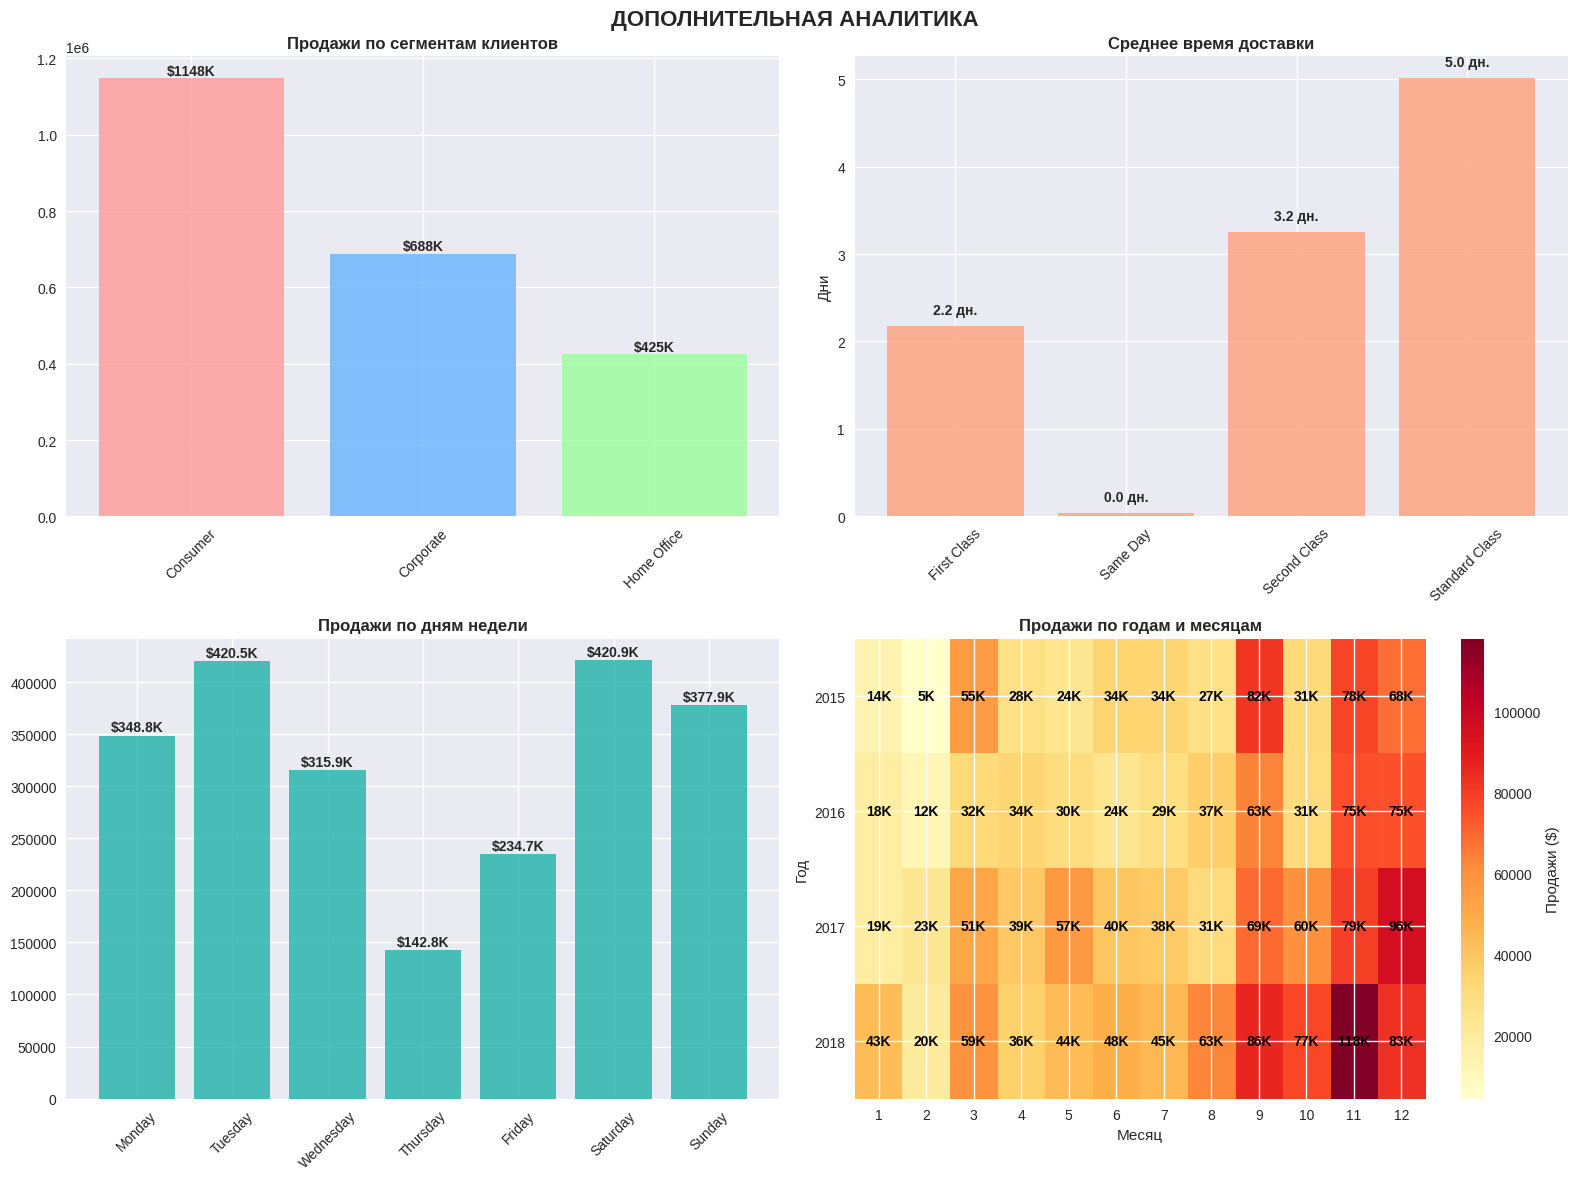

In [ ]:
def create_additional_visualizations(df, segment_sales, shipping_info, weekday_sales):
    print("ДОПОЛНИТЕЛЬНЫЕ ГРАФИКИ")

    # Создание второй сетки графиков
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('ДОПОЛНИТЕЛЬНАЯ АНАЛИТИКА', fontsize=16, fontweight='bold')

    # Продажи по сегментам клиентов
    segments = segment_sales.index
    segment_values = segment_sales['Общие продажи']
    segment_colors = ['#FF9999', '#66B3FF', '#99FF99']

    bars = axes[0, 0].bar(segments, segment_values, color=segment_colors, alpha=0.8)
    axes[0, 0].set_title('Продажи по сегментам клиентов', fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)

    for bar, value in zip(bars, segment_values):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                       f'${value/1000:.0f}K', ha='center', va='bottom', fontweight='bold')

    # Время и способы доставки
    ship_modes = shipping_info.index
    delivery_times = shipping_info['Среднее время доставки']

    bars = axes[0, 1].bar(ship_modes, delivery_times, color='#FFA07A', alpha=0.8)
    axes[0, 1].set_title('Среднее время доставки', fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].set_ylabel('Дни')

    for bar, days in zip(bars, delivery_times):
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                       f'{days:.1f} дн.', ha='center', va='bottom', fontweight='bold')

    # Продажи по дням недели
    days = weekday_sales.index
    day_sales = weekday_sales['Общие продажи']

    bars = axes[1, 0].bar(days, day_sales, color='#20B2AA', alpha=0.8)
    axes[1, 0].set_title('Продажи по дням недели', fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=45)

    for bar, value in zip(bars, day_sales):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                       f'${value/1000:.1f}K', ha='center', va='bottom', fontweight='bold')

    # Тепловая карта продаж по месяцам
    monthly_pivot = df.pivot_table(values='Sales', index='Order_Year', columns='Order_Month', aggfunc='sum').fillna(0)

    im = axes[1, 1].imshow(monthly_pivot, cmap='YlOrRd', aspect='auto')
    axes[1, 1].set_title('Продажи по годам и месяцам', fontweight='bold')
    axes[1, 1].set_xlabel('Месяц')
    axes[1, 1].set_ylabel('Год')
    axes[1, 1].set_xticks(range(12))
    axes[1, 1].set_xticklabels(range(1, 13))
    axes[1, 1].set_yticks(range(len(monthly_pivot.index)))
    axes[1, 1].set_yticklabels(monthly_pivot.index)

    # Аннотации
    for i in range(len(monthly_pivot.index)):
        for j in range(len(monthly_pivot.columns)):
            text = axes[1, 1].text(j, i, f'{monthly_pivot.iloc[i, j]/1000:.0f}K',
                                 ha="center", va="center", color="black", fontweight='bold')

    plt.colorbar(im, ax=axes[1, 1], label='Продажи ($)')
    plt.tight_layout()
    plt.show()

# Запуск дополнительных визуализаций
create_additional_visualizations(df_clean, segment_sales, shipping_info, weekday_sales)

АНАЛИЗ СЕЗОННОСТИ:


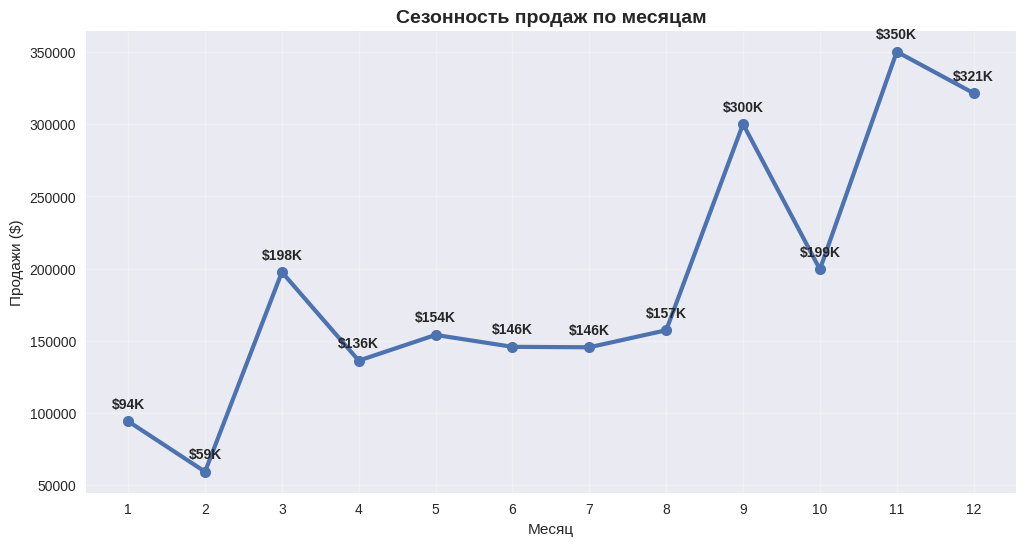


АНАЛИЗ КОРЗИНЫ ПОКУПОК:
   • Средняя сумма заказа: $459.48
   • Среднее количество товаров в заказе: 2.0
   • Максимальная сумма заказа: $23661.23
   • Самый большой заказ (кол-во товаров): 14

ЭФФЕКТИВНОСТЬ ДОСТАВКИ:
   • Заказов с задержкой доставки: 0 (0.0%)


In [ ]:
def advanced_analysis(df):
    # Анализ сезонности
    print("АНАЛИЗ СЕЗОННОСТИ:")
    monthly_trend = df.groupby('Order_Month')['Sales'].sum()

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=3, markersize=8)
    plt.title('Сезонность продаж по месяцам', fontweight='bold', fontsize=14)
    plt.xlabel('Месяц')
    plt.ylabel('Продажи ($)')
    plt.grid(True, alpha=0.3)
    plt.xticks(range(1, 13))

    for month, sales in zip(monthly_trend.index, monthly_trend.values):
        plt.text(month, sales + monthly_trend.max() * 0.02, f'${sales/1000:.0f}K',
                ha='center', va='bottom', fontweight='bold')

    plt.show()

    # Анализ корзины покупок
    print("\nАНАЛИЗ КОРЗИНЫ ПОКУПОК:")
    order_size = df.groupby('Order_ID').agg({
        'Sales': 'sum',
        'Product_ID': 'count'
    })
    order_size.columns = ['Сумма заказа', 'Количество товаров']

    print(f"   • Средняя сумма заказа: ${order_size['Сумма заказа'].mean():.2f}")
    print(f"   • Среднее количество товаров в заказе: {order_size['Количество товаров'].mean():.1f}")
    print(f"   • Максимальная сумма заказа: ${order_size['Сумма заказа'].max():.2f}")
    print(f"   • Самый большой заказ (кол-во товаров): {order_size['Количество товаров'].max()}")

    # Анализ эффективности доставки
    print("\nЭФФЕКТИВНОСТЬ ДОСТАВКИ:")
    late_deliveries = df[df['Shipping_Days'] > df.groupby('Ship_Mode')['Shipping_Days'].transform('mean') + 7]
    print(f"   • Заказов с задержкой доставки: {len(late_deliveries)} ({len(late_deliveries)/len(df)*100:.1f}%)")

    return order_size, monthly_trend

# Запуск анализа
order_analysis, seasonal_trend = advanced_analysis(df_clean)

Корзина покупок:

Средние показатели:
- Средняя сумма заказа: $459.48

- Среднее количество товаров: 2 товара на заказ
- Типичная корзина: 2 товара на сумму ~$460

Максимальные значения:
- Максимальный заказ: $23,661.23 (крупная оптовая покупка)
- Самый большой заказ: 14 товаров (максимальное разнообразие)

Выводы по покупательскому поведению:
- Преобладают средние чеки - стабильный бизнес
- Типичная покупка - 2 товара - рациональное потребление

АНАЛИЗ ВЫБРОСОВ
СТАТИСТИКА ПРОДАЖ:
   • Q1 (25% перцентиль): $17.25
   • Q3 (75% перцентиль): $210.61
   • IQR: $193.36
   • Нижняя граница: $-272.79
   • Верхняя граница: $500.64
   • Выбросов обнаружено: 1145 (11.68%)

ТОП-5 САМЫХ КРУПНЫХ ЗАКАЗОВ (выбросы):


,Order_ID,Product_Name,Sales,Category
2697,CA-2015-145317,Cisco TelePresence System EX90 Videoconferenci...,22638.480,Technology
6826,CA-2017-118689,Canon imageCLASS 2200 Advanced Copier,17499.950,Technology
8153,CA-2018-140151,Canon imageCLASS 2200 Advanced Copier,13999.960,Technology
2623,CA-2018-127180,Canon imageCLASS 2200 Advanced Copier,11199.968,Technology
4190,CA-2018-166709,Canon imageCLASS 2200 Advanced Copier,10499.970,Technology


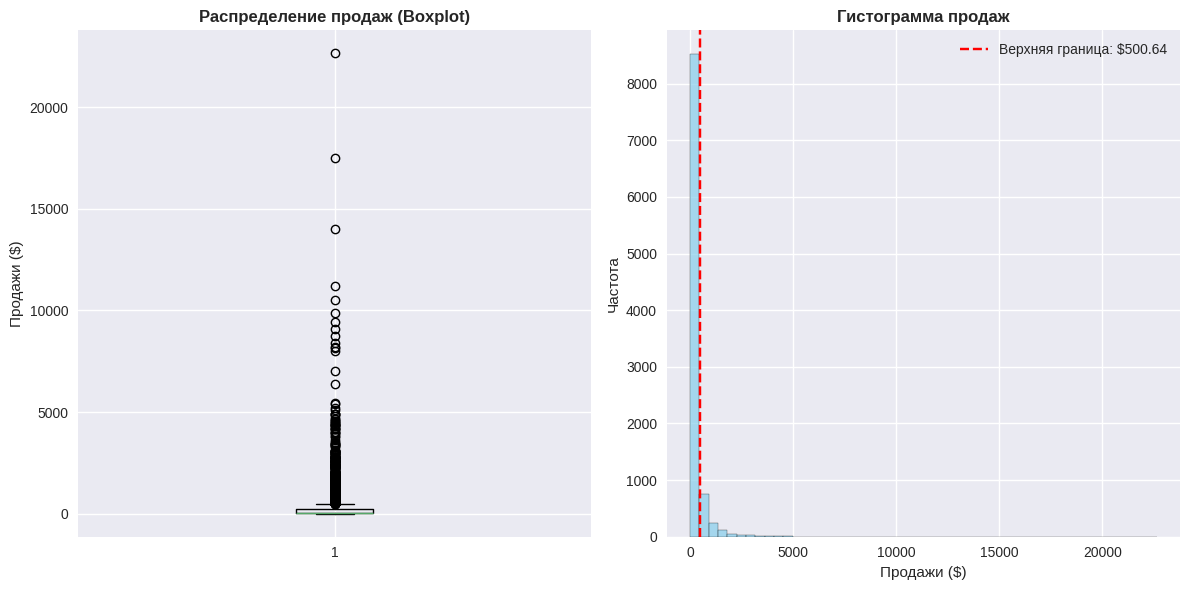

In [ ]:
def analyze_outliers(df):
    print("АНАЛИЗ ВЫБРОСОВ")

    # Анализ выбросов в продажах
    sales_data = df['Sales']
    Q1 = sales_data.quantile(0.25)
    Q3 = sales_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

    print(f"СТАТИСТИКА ПРОДАЖ:")
    print(f"   • Q1 (25% перцентиль): ${Q1:.2f}")
    print(f"   • Q3 (75% перцентиль): ${Q3:.2f}")
    print(f"   • IQR: ${IQR:.2f}")
    print(f"   • Нижняя граница: ${lower_bound:.2f}")
    print(f"   • Верхняя граница: ${upper_bound:.2f}")
    print(f"   • Выбросов обнаружено: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

    if len(outliers) > 0:
        print(f"\nТОП-5 САМЫХ КРУПНЫХ ЗАКАЗОВ (выбросы):")
        top_outliers = outliers.nlargest(5, 'Sales')[['Order_ID', 'Product_Name', 'Sales', 'Category']]
        display(top_outliers)

    # Визуализация выбросов
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.boxplot(df['Sales'])
    plt.title('Распределение продаж (Boxplot)', fontweight='bold')
    plt.ylabel('Продажи ($)')

    plt.subplot(1, 2, 2)
    plt.hist(df['Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(upper_bound, color='red', linestyle='--', label=f'Верхняя граница: ${upper_bound:.2f}')
    plt.title('Гистограмма продаж', fontweight='bold')
    plt.xlabel('Продажи ($)')
    plt.ylabel('Частота')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return outliers

# Запуск анализа выбросов
sales_outliers = analyze_outliers(df_clean)

In [ ]:
def generate_summary_report(df, category_sales, region_sales, segment_sales, yearly_sales):
    print("ИТОГОВЫЙ ОТЧЕТ")

    # Основные метрики
    total_sales = df['Sales'].sum()
    avg_order_value = df['Sales'].mean()
    total_orders = df['Order_ID'].nunique()
    total_customers = df['Customer_ID'].nunique()
    total_products = df['Product_ID'].nunique()
    avg_shipping_days = df['Shipping_Days'].mean()

    print("ОСНОВНЫЕ ПОКАЗАТЕЛИ:")
    print(f"    Общий объем продаж: ${total_sales:,.2f}")
    print(f"    Средний чек: ${avg_order_value:.2f}")
    print(f"    Всего заказов: {total_orders}")
    print(f"    Всего клиентов: {total_customers}")
    print(f"    Всего товаров: {total_products}")
    print(f"    Среднее время доставки: {avg_shipping_days:.1f} дней")
    print(f"    Период анализа: {df['Order_Date'].min().strftime('%d.%m.%Y')} - {df['Order_Date'].max().strftime('%d.%m.%Y')}")

    print("\nКЛЮЧЕВЫЕ ИНСАЙТЫ:")

    # Лучшие показатели
    best_category = category_sales['Общие продажи'].idxmax()
    best_region = region_sales['Общие продажи'].idxmax()
    best_segment = segment_sales['Общие продажи'].idxmax()
    fastest_shipping = df.groupby('Ship_Mode')['Shipping_Days'].mean().idxmin()

    print(f"    Самая прибыльная категория: {best_category} (${category_sales.loc[best_category, 'Общие продажи']:,.2f})")
    print(f"    Лучший регион: {best_region} (${region_sales.loc[best_region, 'Общие продажи']:,.2f})")
    print(f"    Лучший сегмент клиентов: {best_segment}")
    print(f"    Самый быстрый способ доставки: {fastest_shipping}")

    # Рост продаж
    if len(yearly_sales) > 1:
        growth = ((yearly_sales.iloc[-1]['Общие продажи'] - yearly_sales.iloc[0]['Общие продажи']) /
                 yearly_sales.iloc[0]['Общие продажи'] * 100)
        print(f"    Общий рост продаж за период: {growth:.1f}%")

    print("\n РЕКОМЕНДАЦИИ:")

    recommendations = []

    # Анализ для рекомендаций
    category_share = category_sales['Доля в продажах (%)']
    if category_share.max() > 50:
        recommendations.append(f"• Диверсифицировать ассортимент - категория '{best_category}' занимает {category_share.max():.1f}% продаж")

    region_share = region_sales['Доля в продажах (%)']
    if region_share.min() < 15:
        worst_region = region_share.idxmin()
        recommendations.append(f"• Усилить маркетинг в регионе '{worst_region}' (только {region_share.min():.1f}% продаж)")

    shipping_analysis = df.groupby('Ship_Mode')['Sales'].sum()
    if shipping_analysis.idxmin() != fastest_shipping:
        recommendations.append(f"• Продвигать способ доставки '{fastest_shipping}' - самый быстрый, но не самый популярный")

    if not recommendations:
        recommendations.append("• Продолжать текущую успешную стратегию - все показатели сбалансированы")

    for rec in recommendations:
        print(f"   {rec}")


# Генерация итогового отчета
generate_summary_report(df_clean, category_sales, region_sales, segment_sales, yearly_sales)

ИТОГОВЫЙ ОТЧЕТ
ОСНОВНЫЕ ПОКАЗАТЕЛИ:
    Общий объем продаж: $2,261,536.78
    Средний чек: $230.77
    Всего заказов: 4922
    Всего клиентов: 793
    Всего товаров: 1861
    Среднее время доставки: 4.0 дней
    Период анализа: 03.01.2015 - 30.12.2018

КЛЮЧЕВЫЕ ИНСАЙТЫ:
    Самая прибыльная категория: Technology ($827,455.87)
    Лучший регион: West ($710,219.68)
    Лучший сегмент клиентов: Consumer
    Самый быстрый способ доставки: Same Day
    Общий рост продаж за период: 50.5%

 РЕКОМЕНДАЦИИ:
   • Продолжать текущую успешную стратегию - все показатели сбалансированы


# Основные показатели качества для графиков на дашборде

In [ ]:
def display_performance_metrics(df):
    print("КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ ЭФФЕКТИВНОСТИ")

    # Расчет основных метрик
    total_sales = df['Sales'].sum()
    total_orders = df['Order_ID'].nunique()
    total_customers = df['Customer_ID'].nunique()
    avg_order_value = df['Sales'].mean()
    avg_shipping_days = df['Shipping_Days'].mean()

    # Расчет роста
    current_year_sales = df[df['Order_Year'] == df['Order_Year'].max()]['Sales'].sum()
    previous_year_sales = df[df['Order_Year'] == df['Order_Year'].max() - 1]['Sales'].sum()
    sales_growth = ((current_year_sales - previous_year_sales) / previous_year_sales * 100) if previous_year_sales > 0 else 0

    # Расчет по категориям
    category_sales = df.groupby('Category')['Sales'].sum()
    top_category = category_sales.idxmax()
    top_category_sales = category_sales.max()

    # Расчет по регионам
    region_sales = df.groupby('Region')['Sales'].sum()
    top_region = region_sales.idxmax()

    # Расчет эффективности доставки
    on_time_threshold = df.groupby('Ship_Mode')['Shipping_Days'].mean()
    on_time_deliveries = df[df.apply(lambda x: x['Shipping_Days'] <= on_time_threshold[x['Ship_Mode']], axis=1)]
    on_time_rate = (len(on_time_deliveries) / len(df)) * 100

    # Расчет повторных покупок
    customer_orders = df.groupby('Customer_ID')['Order_ID'].nunique()
    repeat_customers = len(customer_orders[customer_orders > 1])
    repeat_rate = (repeat_customers / total_customers) * 100

    print("\n" + "ОСНОВНЫЕ KPI".center(80, ' '))
    print("-" * 80)

    # Создаем красивый вывод основных KPI
    kpi_data = [
        ("ОБЩИЕ ПРОДАЖИ", f"${total_sales:,.2f}", f"{sales_growth:+.1f}%"),
        ("ВСЕГО ЗАКАЗОВ", f"{total_orders:,}", ""),
        ("УНИКАЛЬНЫХ КЛИЕНТОВ", f"{total_customers:,}", ""),
        ("СРЕДНИЙ ЧЕК", f"${avg_order_value:.2f}", ""),
        ("СРЕДНЯЯ ДОСТАВКА", f"{avg_shipping_days:.1f} дн.", ""),
        ("СВОЕВРЕМЕННЫХ ДОСТАВОК", f"{on_time_rate:.1f}%", ""),
        ("ПОВТОРНЫХ КЛИЕНТОВ", f"{repeat_rate:.1f}%", f"{repeat_customers:,} клиентов")
    ]

    for name, value, change in kpi_data:
        print(f"  {name:<25} {value:>20} {change:>15}")

    print("\n" + "ЛИДЕРЫ ПО КАТЕГОРИЯМ".center(80, ' '))
    print("-" * 80)

    # Топ категории
    for category in category_sales.sort_values(ascending=False).items():
        name, sales = category
        share = (sales / total_sales) * 100
        print(f"  {name:<20} ${sales:>12,.2f} ({share:>5.1f}%)")

    print("\n" + "ГЕОГРАФИЧЕСКИЕ ПОКАЗАТЕЛИ".center(80, ' '))
    print("-" * 80)

    # Региональные показатели
    for region in region_sales.sort_values(ascending=False).items():
        name, sales = region
        share = (sales / total_sales) * 100
        print(f"  {name:<15} ${sales:>12,.2f} ({share:>5.1f}%)")

    return {
        'total_sales': total_sales,
        'total_orders': total_orders,
        'total_customers': total_customers,
        'avg_order_value': avg_order_value,
        'sales_growth': sales_growth,
        'on_time_rate': on_time_rate,
        'repeat_rate': repeat_rate
    }

# Вывод показателей
metrics = display_performance_metrics(df_clean)

КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ ЭФФЕКТИВНОСТИ

                                  ОСНОВНЫЕ KPI                                  
--------------------------------------------------------------------------------
  ОБЩИЕ ПРОДАЖИ                    $2,261,536.78          +20.3%
  ВСЕГО ЗАКАЗОВ                            4,922                
  УНИКАЛЬНЫХ КЛИЕНТОВ                        793                
  СРЕДНИЙ ЧЕК                            $230.77                
  СРЕДНЯЯ ДОСТАВКА                       4.0 дн.                
  СВОЕВРЕМЕННЫХ ДОСТАВОК                   67.3%                
  ПОВТОРНЫХ КЛИЕНТОВ                       98.4%    780 клиентов

                              ЛИДЕРЫ ПО КАТЕГОРИЯМ                              
--------------------------------------------------------------------------------
  Technology           $  827,455.87 ( 36.6%)
  Furniture            $  728,658.58 ( 32.2%)
  Office Supplies      $  705,422.33 ( 31.2%)

                           ГЕОГРАФИЧЕСКИЕ ПОКА

SIMPLE DASHBOARD


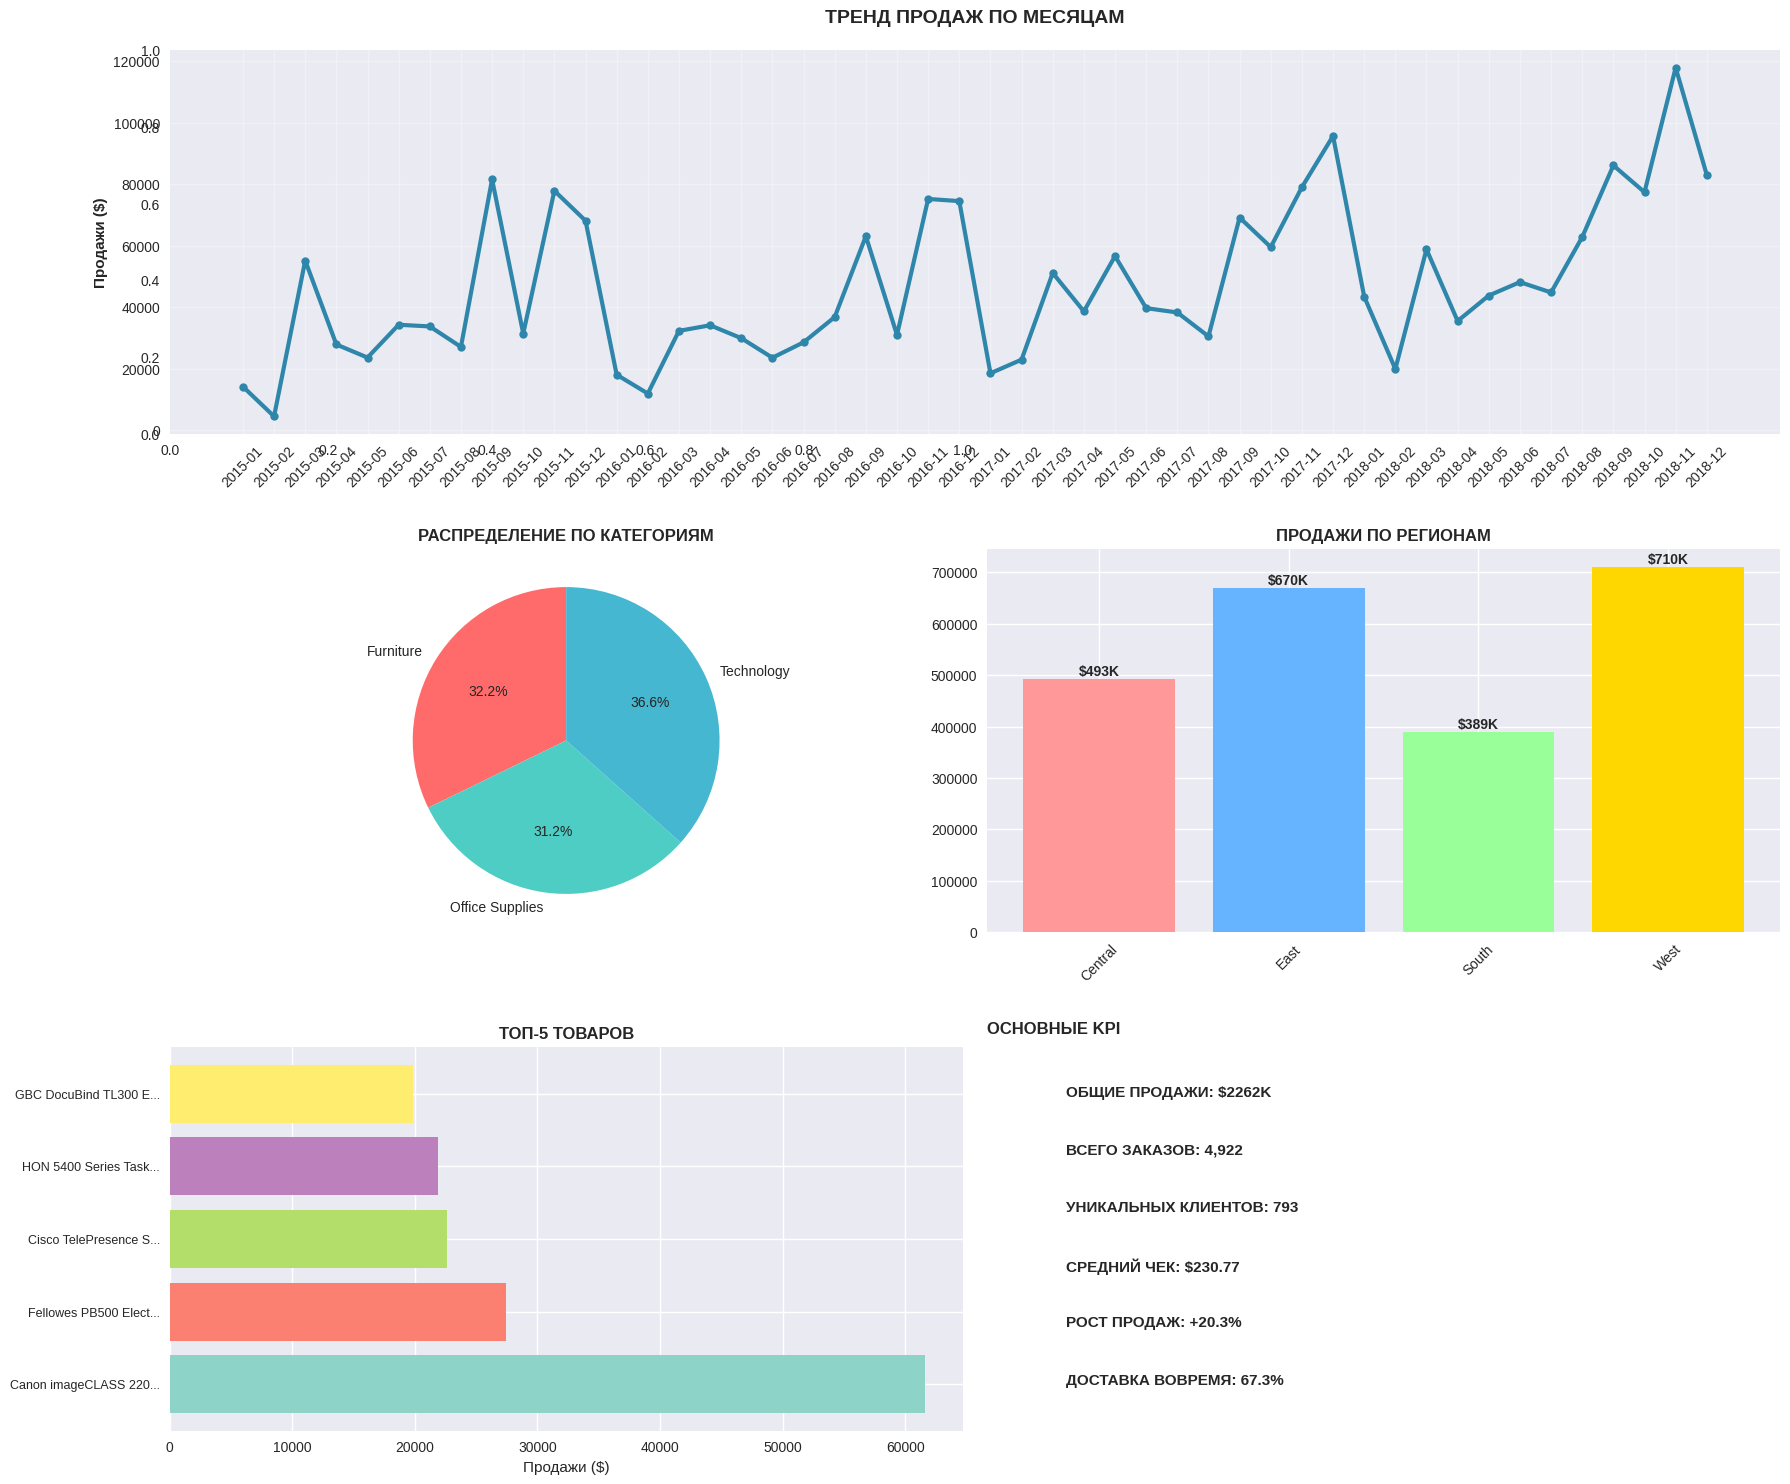

In [ ]:
def create_simple_dashboard(df, metrics):
    print("SIMPLE DASHBOARD")
    fig, axes = plt.subplots(3, 2, figsize=(18, 15))
    plt.subplots_adjust(hspace=0.5, wspace=0.4)

    # Тренд продаж
    ax1 = axes[0, 0]
    ax2 = axes[0, 1]

    fig.delaxes(ax2)
    ax_trend = fig.add_subplot(3, 2, (1, 2))

    monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Sales'].sum()
    monthly_dates = [f"{y}-{m:02d}" for y, m in monthly_sales.index]

    ax_trend.plot(monthly_dates, monthly_sales.values, marker='o', linewidth=3,
                 color='#2E86AB', markersize=6)
    ax_trend.set_title('ТРЕНД ПРОДАЖ ПО МЕСЯЦАМ', fontweight='bold', fontsize=14, pad=20)
    ax_trend.tick_params(axis='x', rotation=45)
    ax_trend.grid(True, alpha=0.3)
    ax_trend.set_ylabel('Продажи ($)', fontweight='bold')

    # Категории
    ax3 = axes[1, 0]
    category_sales = df.groupby('Category')['Sales'].sum()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    ax3.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    ax3.set_title('РАСПРЕДЕЛЕНИЕ ПО КАТЕГОРИЯМ', fontweight='bold', fontsize=12)

    # Регионы
    ax4 = axes[1, 1]
    region_sales = df.groupby('Region')['Sales'].sum()
    bars = ax4.bar(region_sales.index, region_sales.values,
                  color=['#FF9999', '#66B3FF', '#99FF99', '#FFD700'])
    ax4.set_title('ПРОДАЖИ ПО РЕГИОНАМ', fontweight='bold', fontsize=12)
    ax4.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars, region_sales.values):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 1000,
                f'${value/1000:.0f}K', ha='center', va='bottom', fontweight='bold')

    # Топ товары
    ax5 = axes[2, 0]
    top_products = df.groupby('Product_Name')['Sales'].sum().nlargest(5)
    bars = ax5.barh(range(len(top_products)), top_products.values,
                   color=plt.cm.Set3(np.linspace(0, 1, len(top_products))))
    ax5.set_yticks(range(len(top_products)))
    ax5.set_yticklabels([name[:20] + '...' if len(name) > 20 else name
                        for name in top_products.index], fontsize=9)
    ax5.set_title('ТОП-5 ТОВАРОВ', fontweight='bold', fontsize=12)
    ax5.set_xlabel('Продажи ($)')

    # KPI метрики
    ax6 = axes[2, 1]
    ax6.axis('off')

    kpi_text = [
        f"ОБЩИЕ ПРОДАЖИ: ${metrics['total_sales']/1000:.0f}K",
        f"ВСЕГО ЗАКАЗОВ: {metrics['total_orders']:,}",
        f"УНИКАЛЬНЫХ КЛИЕНТОВ: {metrics['total_customers']:,}",
        f"СРЕДНИЙ ЧЕК: ${metrics['avg_order_value']:.2f}",
        f"РОСТ ПРОДАЖ: {metrics['sales_growth']:+.1f}%",
        f"ДОСТАВКА ВОВРЕМЯ: {metrics['on_time_rate']:.1f}%"
    ]

    for i, text in enumerate(kpi_text):
        ax6.text(0.1, 0.9 - i*0.15, text, fontsize=11, fontweight='bold',
                transform=ax6.transAxes, verticalalignment='top')

    ax6.set_title('ОСНОВНЫЕ KPI', fontweight='bold', fontsize=12,
                 loc='left', pad=10)

    plt.tight_layout()
    plt.show()

    return fig

# Запуск простого дашборда
simple_dashboard = create_simple_dashboard(df_clean, metrics)

ПРОВЕРКА ГИПОТЕЗ

ГИПОТЕЗА: 20% КЛИЕНТОВ ПРИНОСЯТ 80% ВЫРУЧКИ
   • 20% клиентов приносят: 48.5% выручки
   • Топ-10 клиентов: 6.8% выручки
   • Топ-50 клиентов: 22.6% выручки
20% клиентов приносят 48.5% выручки
ВЫВОД: ГИПОТЕЗА ОПРОВЕРГНУТА - концентрация слабее ожидаемой


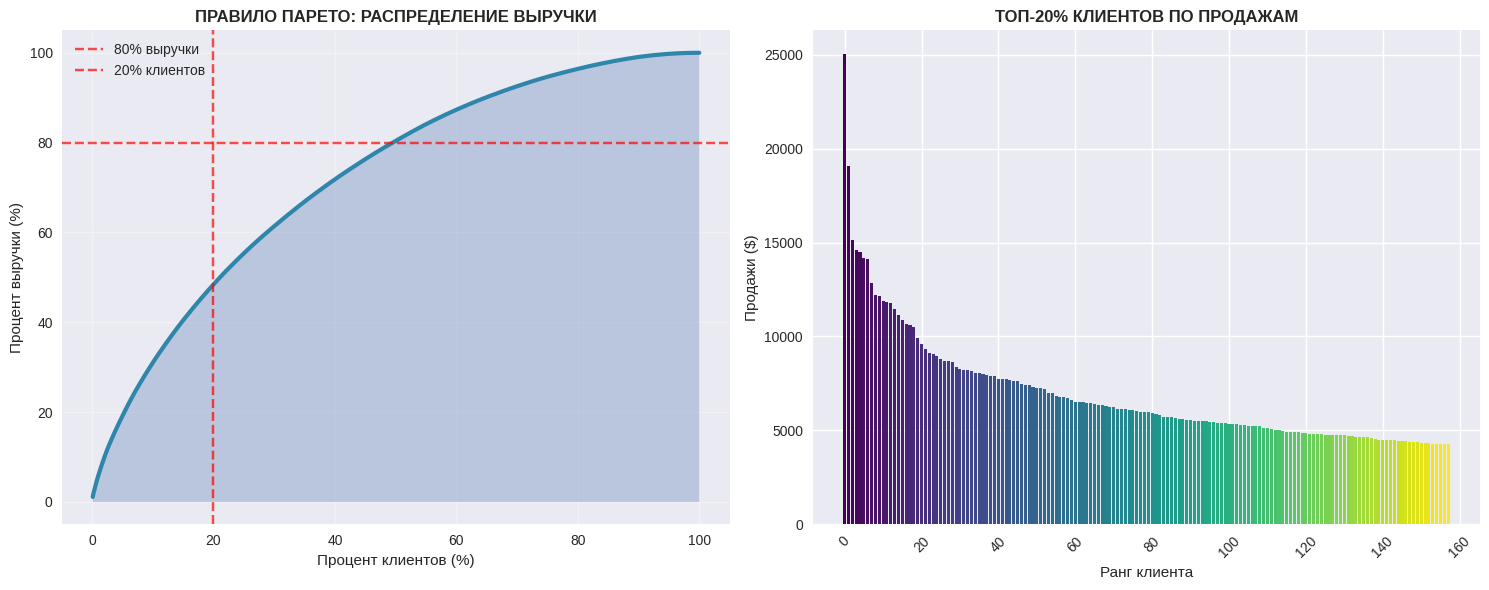


ГИПОТЕЗА: TECHNOLOGY ИМЕЕТ ВЫСОКУЮ СЕЗОННОСТЬ
   • Коэффициент сезонности по категориям:
     Furniture: 0.598
     Office Supplies: 0.573
     Technology: 0.601
ВЫВОД: ГИПОТЕЗА ПОДТВЕРЖДЕНА - Technology имеет самую высокую сезонность (0.601)


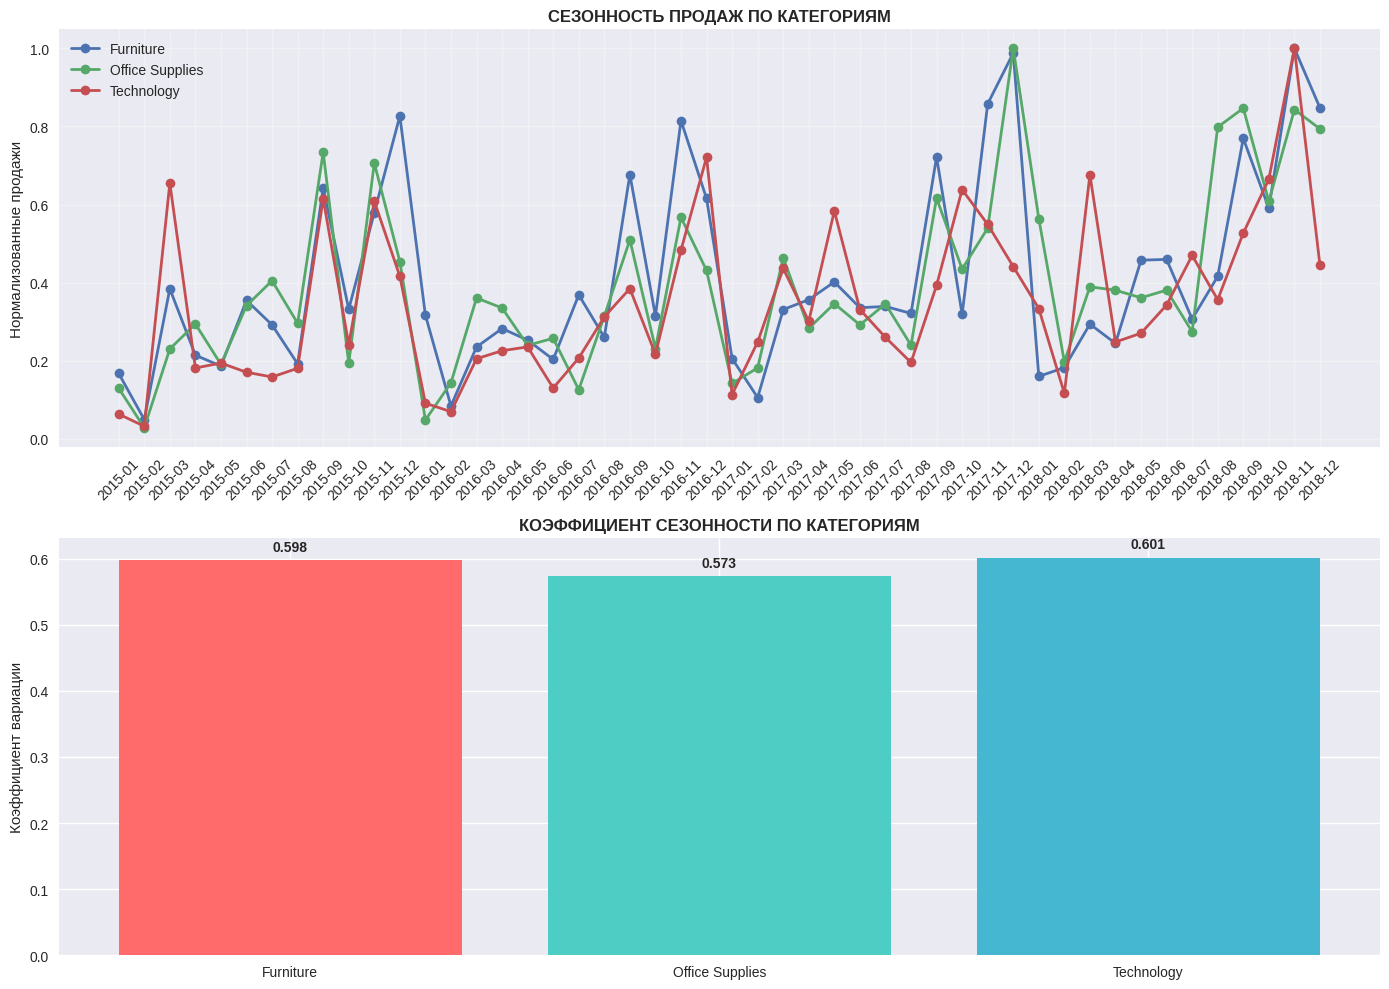


ГИПОТЕЗА: ПОНЕДЕЛЬНИК - ДЕНЬ САМЫХ ВЫГОДНЫХ ПОКУПОК
   • Средний чек по дням недели:
     Monday: $218.95
     Tuesday: $222.62
     Wednesday: $257.03
     Thursday: $264.03
     Friday: $219.97
     Saturday: $235.67
     Sunday: $222.93
   • Лучший день: Thursday ($264.03)
   • Худший день: Monday ($218.95)
ВЫВОД: ГИПОТЕЗА ОПРОВЕРГНУТА - лучший день для продаж: Thursday ($264.03)


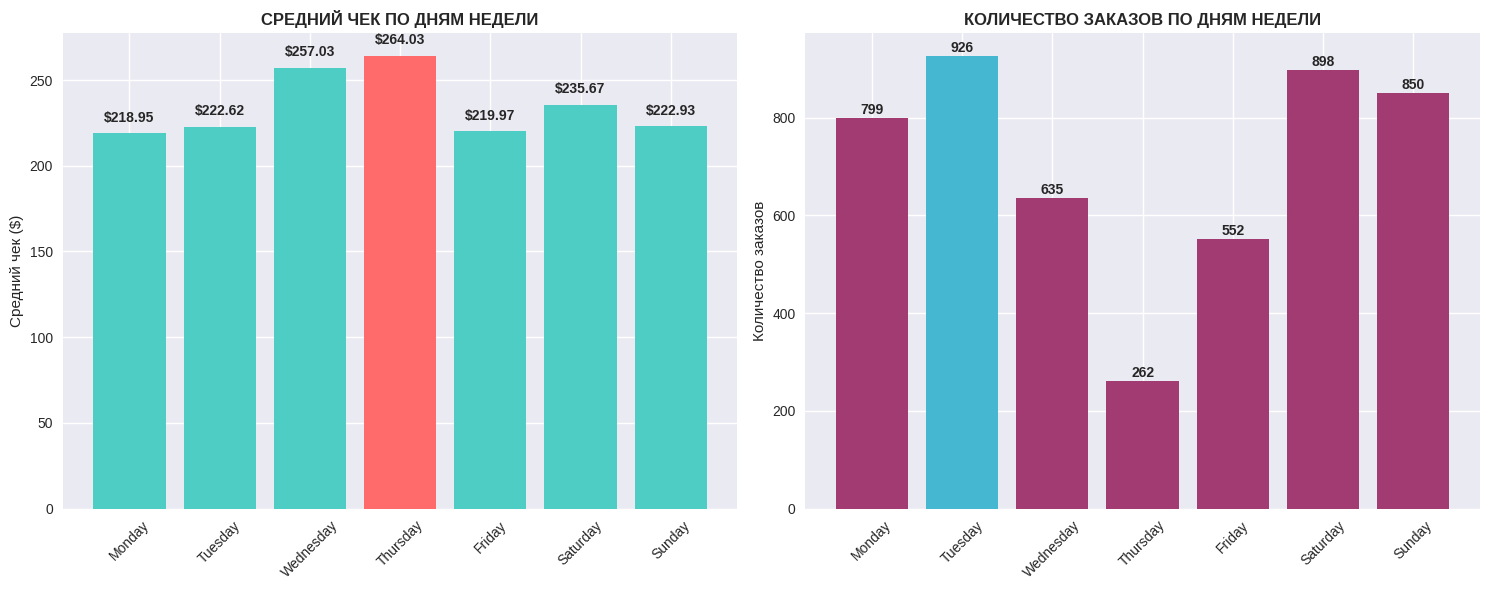


ГИПОТЕЗА: ДОРОГИЕ ЗАКАЗЫ ДОСТАВЛЯЮТСЯ БЫСТРЕЕ
   • Среднее время доставки по квартилям стоимости:
     Q1 (дешевые): 4.0 дней
     Q2: 4.0 дней
     Q3: 4.0 дней
     Q4 (дорогие): 3.9 дней
   • T-тест: t=-0.984, p-value=0.3252
   • Разница не статистически значима
ВЫВОД: ГИПОТЕЗА ОПРОВЕРГНУТА - статистически значимой разницы нет (p=0.3252)


/tmp/ipython-input-3605058037.py:210: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shipping_by_quartile = order_analysis.groupby('Sales_Quartile')['Shipping_Days'].mean()


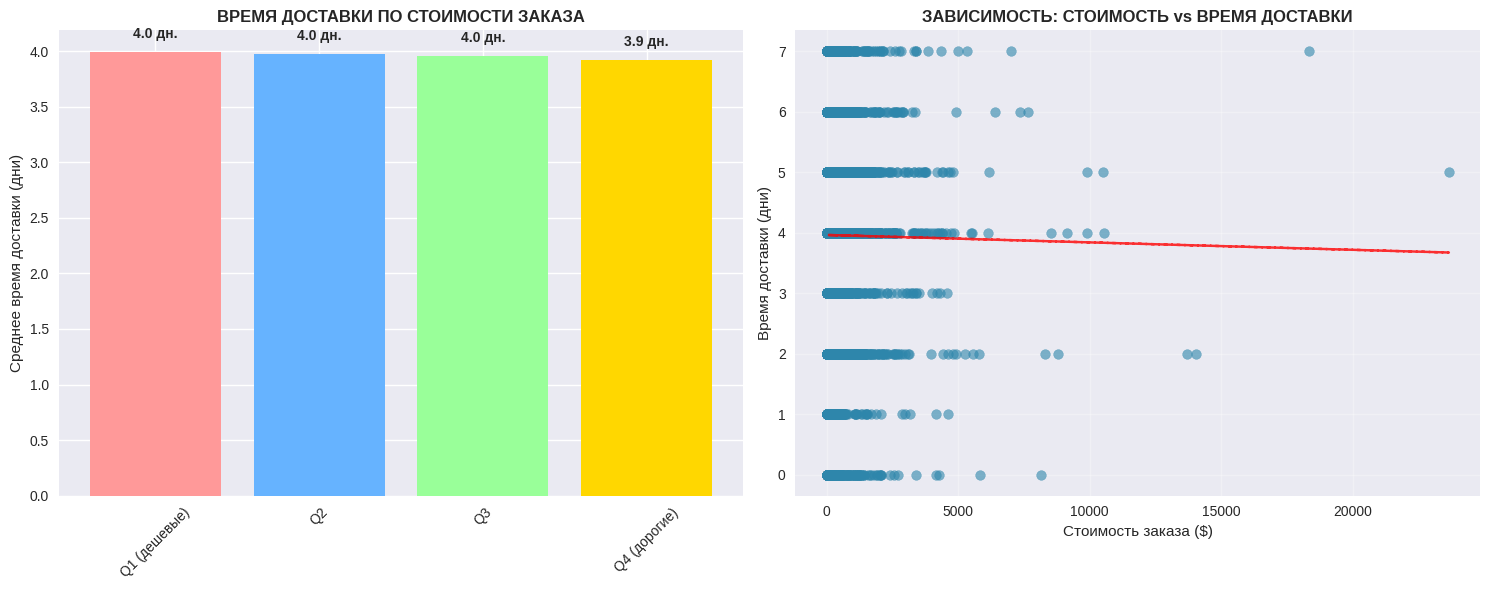

In [ ]:
def test_nontrivial_hypotheses(df):
    print("ПРОВЕРКА ГИПОТЕЗ")

    # Гипотеза 1: Правило Парето (20/80)
    print("\nГИПОТЕЗА: 20% КЛИЕНТОВ ПРИНОСЯТ 80% ВЫРУЧКИ")

    customer_sales = df.groupby('Customer_ID')['Sales'].sum().sort_values(ascending=False)
    total_sales = customer_sales.sum()

    # Кумулятивное распределение
    cumulative_sales = customer_sales.cumsum()
    cumulative_percentage = cumulative_sales / total_sales * 100
    customer_percentage = np.arange(1, len(customer_sales) + 1) / len(customer_sales) * 100

    # Находим точку где 20% клиентов
    idx_20_percent = int(len(customer_sales) * 0.2)
    sales_at_20_percent = cumulative_percentage.iloc[idx_20_percent]

    print(f"   • 20% клиентов приносят: {sales_at_20_percent:.1f}% выручки")
    print(f"   • Топ-10 клиентов: {cumulative_percentage.iloc[9]:.1f}% выручки")
    print(f"   • Топ-50 клиентов: {cumulative_percentage.iloc[49]:.1f}% выручки")

    # Визуализация правила Парето
    #Примерно 80% результата дают 20% усилий, а остальные 80% усилий приносят лишь 20% результата
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Кумулятивная кривая
    ax1.plot(customer_percentage, cumulative_percentage.values, linewidth=3, color='#2E86AB')
    ax1.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% выручки')
    ax1.axvline(x=20, color='red', linestyle='--', alpha=0.7, label='20% клиентов')
    ax1.fill_between(customer_percentage, cumulative_percentage.values, alpha=0.3)
    ax1.set_xlabel('Процент клиентов (%)')
    ax1.set_ylabel('Процент выручки (%)')
    ax1.set_title('ПРАВИЛО ПАРЕТО: РАСПРЕДЕЛЕНИЕ ВЫРУЧКИ', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Топ клиенты
    top_20_customers = customer_sales.head(int(len(customer_sales) * 0.2))
    ax2.bar(range(len(top_20_customers)), top_20_customers.values,
            color=plt.cm.viridis(np.linspace(0, 1, len(top_20_customers))))
    ax2.set_xlabel('Ранг клиента')
    ax2.set_ylabel('Продажи ($)')
    ax2.set_title('ТОП-20% КЛИЕНТОВ ПО ПРОДАЖАМ', fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)

    # РЕЗУЛЬТАТ
    print(f"20% клиентов приносят {sales_at_20_percent:.1f}% выручки")

    if sales_at_20_percent >= 80:
        conclusion = "ГИПОТЕЗА ПОДТВЕРЖДЕНА - классическое правило 20/80 работает"
    elif sales_at_20_percent >= 70:
        conclusion = "ГИПОТЕЗА ЧАСТИЧНО ПОДТВЕРЖДЕНА - сильная концентрация, но не 80%"
    elif sales_at_20_percent >= 60:
        conclusion = "УМЕРЕННАЯ КОНЦЕНТРАЦИЯ - правило 20/60"
    else:
        conclusion = "ГИПОТЕЗА ОПРОВЕРГНУТА - концентрация слабее ожидаемой"

    print(f"ВЫВОД: {conclusion}")

    plt.tight_layout()
    plt.show()

    # Гипотеза 2: Сезонность по категориям
    print("\nГИПОТЕЗА: TECHNOLOGY ИМЕЕТ ВЫСОКУЮ СЕЗОННОСТЬ")

    # Анализ сезонности по категориям
    df['Order_Period'] = df['Order_Date'].dt.to_period('M')
    seasonal_analysis = df.pivot_table(
        values='Sales',
        index='Order_Period',
        columns='Category',
        aggfunc='sum'
    ).fillna(0)

    # Нормализуем для сравнения
    seasonal_normalized = seasonal_analysis / seasonal_analysis.max()

    # Коэффициент вариации как мера сезонности
    seasonal_coefficient = seasonal_analysis.std() / seasonal_analysis.mean()

    print("   • Коэффициент сезонности по категориям:")
    for category, coef in seasonal_coefficient.items():
        print(f"     {category}: {coef:.3f}")

    # Визуализация сезонности
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # Нормализованные продажи
    for category in seasonal_normalized.columns:
        ax1.plot(seasonal_normalized.index.astype(str),
                seasonal_normalized[category],
                marker='o', label=category, linewidth=2)

    ax1.set_title('СЕЗОННОСТЬ ПРОДАЖ ПО КАТЕГОРИЯМ', fontweight='bold')
    ax1.set_ylabel('Нормализованные продажи')
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Коэффициент сезонности
    categories = seasonal_coefficient.index
    coefficients = seasonal_coefficient.values

    bars = ax2.bar(categories, coefficients,
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax2.set_title('КОЭФФИЦИЕНТ СЕЗОННОСТИ ПО КАТЕГОРИЯМ', fontweight='bold')
    ax2.set_ylabel('Коэффициент вариации')

    # РЕЗУЛЬТАТ
    tech_seasonality = seasonal_coefficient.get('Technology', 0)
    furniture_seasonality = seasonal_coefficient.get('Furniture', 0)
    office_seasonality = seasonal_coefficient.get('Office Supplies', 0)

    max_seasonality = max(tech_seasonality, furniture_seasonality, office_seasonality)

    if tech_seasonality == max_seasonality:
        conclusion = f"ГИПОТЕЗА ПОДТВЕРЖДЕНА - Technology имеет самую высокую сезонность ({tech_seasonality:.3f})"
    else:
        most_seasonal = [k for k, v in seasonal_coefficient.items() if v == max_seasonality][0]
        conclusion = f"ГИПОТЕЗА ОПРОВЕРГНУТА - самая высокая сезонность у {most_seasonal} ({max_seasonality:.3f})"

    print(f"ВЫВОД: {conclusion}")

    for bar, coef in zip(bars, coefficients):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{coef:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Гипотеза 3: Влияние дня недели на средний чек
    print("\nГИПОТЕЗА: ПОНЕДЕЛЬНИК - ДЕНЬ САМЫХ ВЫГОДНЫХ ПОКУПОК")

    weekday_analysis = df.groupby('Order_DayOfWeek').agg({
        'Sales': ['mean', 'sum', 'count'],
        'Order_ID': 'nunique'
    }).round(2)

    weekday_analysis.columns = ['Средний_чек', 'Общие_продажи', 'Кол_позиций', 'Уник_заказов']

    # Упорядочиваем дни недели
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_analysis = weekday_analysis.reindex(day_order)

    print("   • Средний чек по дням недели:")
    for day, data in weekday_analysis.iterrows():
        print(f"     {day}: ${data['Средний_чек']:.2f}")

    best_day = weekday_analysis['Средний_чек'].idxmax()
    worst_day = weekday_analysis['Средний_чек'].idxmin()

    print(f"   • Лучший день: {best_day} (${weekday_analysis.loc[best_day, 'Средний_чек']:.2f})")
    print(f"   • Худший день: {worst_day} (${weekday_analysis.loc[worst_day, 'Средний_чек']:.2f})")

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Средний чек
    bars1 = ax1.bar(weekday_analysis.index, weekday_analysis['Средний_чек'],
                   color=['#FF6B6B' if x == best_day else '#4ECDC4' for x in weekday_analysis.index])
    ax1.set_title('СРЕДНИЙ ЧЕК ПО ДНЯМ НЕДЕЛИ', fontweight='bold')
    ax1.set_ylabel('Средний чек ($)')
    ax1.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars1, weekday_analysis['Средний_чек']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'${value:.2f}', ha='center', va='bottom', fontweight='bold')

    # Количество заказов
    bars2 = ax2.bar(weekday_analysis.index, weekday_analysis['Уник_заказов'],
                   color=['#45B7D1' if x == weekday_analysis['Уник_заказов'].idxmax() else '#A23B72'
                          for x in weekday_analysis.index])
    ax2.set_title('КОЛИЧЕСТВО ЗАКАЗОВ ПО ДНЯМ НЕДЕЛИ', fontweight='bold')
    ax2.set_ylabel('Количество заказов')
    ax2.tick_params(axis='x', rotation=45)

    # РЕЗУЛЬТАТ
    best_day = weekday_analysis['Средний_чек'].idxmax()
    best_value = weekday_analysis['Средний_чек'].max()

    if best_day == 'Monday':
        conclusion = f"ГИПОТЕЗА ПОДТВЕРЖДЕНА - понедельник лидер по среднему чеку (${best_value:.2f})"
    else:
        conclusion = f"ГИПОТЕЗА ОПРОВЕРГНУТА - лучший день для продаж: {best_day} (${best_value:.2f})"

    print(f"ВЫВОД: {conclusion}")

    for bar, value in zip(bars2, weekday_analysis['Уник_заказов']):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Гипотеза 4: Корреляция между временем доставки и стоимостью заказа
    print("\nГИПОТЕЗА: ДОРОГИЕ ЗАКАЗЫ ДОСТАВЛЯЮТСЯ БЫСТРЕЕ")

    # Анализ связи стоимости заказа и времени доставки
    order_analysis = df.groupby('Order_ID').agg({
        'Sales': 'sum',
        'Shipping_Days': 'mean',
        'Ship_Mode': 'first'
    }).reset_index()

    # Разделяем на квартили по стоимости
    order_analysis['Sales_Quartile'] = pd.qcut(order_analysis['Sales'], 4,
                                              labels=['Q1 (дешевые)', 'Q2', 'Q3', 'Q4 (дорогие)'])

    shipping_by_quartile = order_analysis.groupby('Sales_Quartile')['Shipping_Days'].mean()

    print("   • Среднее время доставки по квартилям стоимости:")
    for quartile, days in shipping_by_quartile.items():
        print(f"     {quartile}: {days:.1f} дней")

    # Статистическая проверка
    from scipy import stats

    expensive_orders = order_analysis[order_analysis['Sales_Quartile'] == 'Q4 (дорогие)']['Shipping_Days']
    cheap_orders = order_analysis[order_analysis['Sales_Quartile'] == 'Q1 (дешевые)']['Shipping_Days']

    t_stat, p_value = stats.ttest_ind(expensive_orders, cheap_orders, nan_policy='omit')

    print(f"   • T-тест: t={t_stat:.3f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print("   • Статистически значимая разница!")
    else:
        print("   • Разница не статистически значима")

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Время доставки по квартилям
    bars = ax1.bar(shipping_by_quartile.index, shipping_by_quartile.values,
                  color=['#FF9999', '#66B3FF', '#99FF99', '#FFD700'])
    ax1.set_title('ВРЕМЯ ДОСТАВКИ ПО СТОИМОСТИ ЗАКАЗА', fontweight='bold')
    ax1.set_ylabel('Среднее время доставки (дни)')
    ax1.tick_params(axis='x', rotation=45)

    for bar, days in zip(bars, shipping_by_quartile.values):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{days:.1f} дн.', ha='center', va='bottom', fontweight='bold')

    # РЕЗУЛЬТАТ
    q1_days = shipping_by_quartile.get('Q1 (дешевые)', 0)
    q4_days = shipping_by_quartile.get('Q4 (дорогие)', 0)

    if p_value < 0.05 and q4_days < q1_days:
        conclusion = f"ГИПОТЕЗА ПОДТВЕРЖДЕНА - дорогие заказы доставляются быстрее (p={p_value:.4f})"
    elif p_value < 0.05 and q4_days > q1_days:
        conclusion = f"ГИПОТЕЗА ОПРОВЕРГНУТА - дорогие заказы доставляются МЕДЛЕННЕЕ (p={p_value:.4f})"
    else:
        conclusion = f"ГИПОТЕЗА ОПРОВЕРГНУТА - статистически значимой разницы нет (p={p_value:.4f})"

    print(f"ВЫВОД: {conclusion}")

    # Диаграмма рассеяния
    ax2.scatter(order_analysis['Sales'], order_analysis['Shipping_Days'],
               alpha=0.6, color='#2E86AB')
    ax2.set_xlabel('Стоимость заказа ($)')
    ax2.set_ylabel('Время доставки (дни)')
    ax2.set_title('ЗАВИСИМОСТЬ: СТОИМОСТЬ vs ВРЕМЯ ДОСТАВКИ', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # Линия тренда
    z = np.polyfit(order_analysis['Sales'], order_analysis['Shipping_Days'], 1)
    p = np.poly1d(z)
    ax2.plot(order_analysis['Sales'], p(order_analysis['Sales']), "r--", alpha=0.8)

    plt.tight_layout()
    plt.show()

# Запуск проверки гипотез
test_nontrivial_hypotheses(df_clean)

ДОПОЛНИТЕЛЬНЫЕ ГИПОТЕЗЫ

ГИПОТЕЗА: КЛИЕНТЫ ИЗ МАЛЫХ ГОРОДОВ БОЛЕЕ ЛОЯЛЬНЫ
   • Среднее количество заказов на клиента:
     Малые города: 1.00
     Крупные города: 1.02
   • T-тест: t=-5.492, p-value=0.0000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipython-input-1688158714.py:59: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


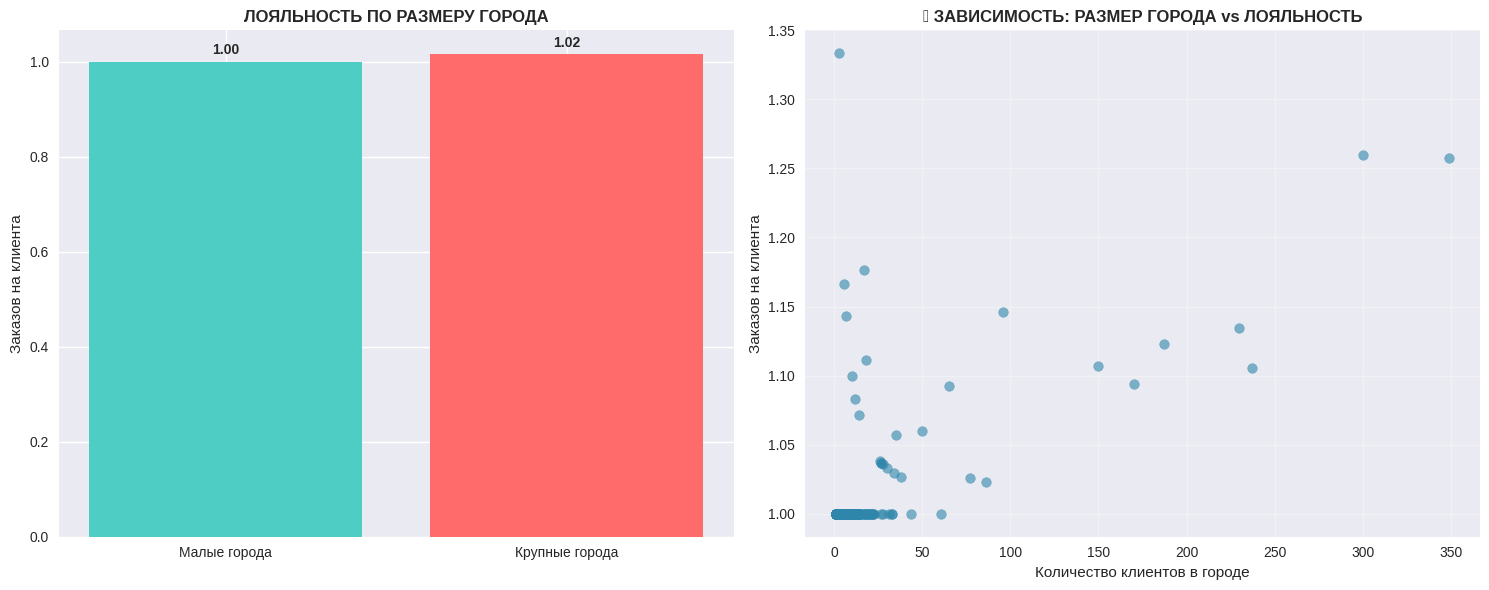


ГИПОТЕЗА: ТОВАРЫ ИЗ OFFICE SUPPLIES ЧАСТО ПОКУПАЮТСЯ С TECHNOLOGY
   • Топ-5 пар категорий в корзине:
     Furniture + Office Supplies: 944 раз
     Office Supplies + Technology: 901 раз
     Furniture + Technology: 473 раз


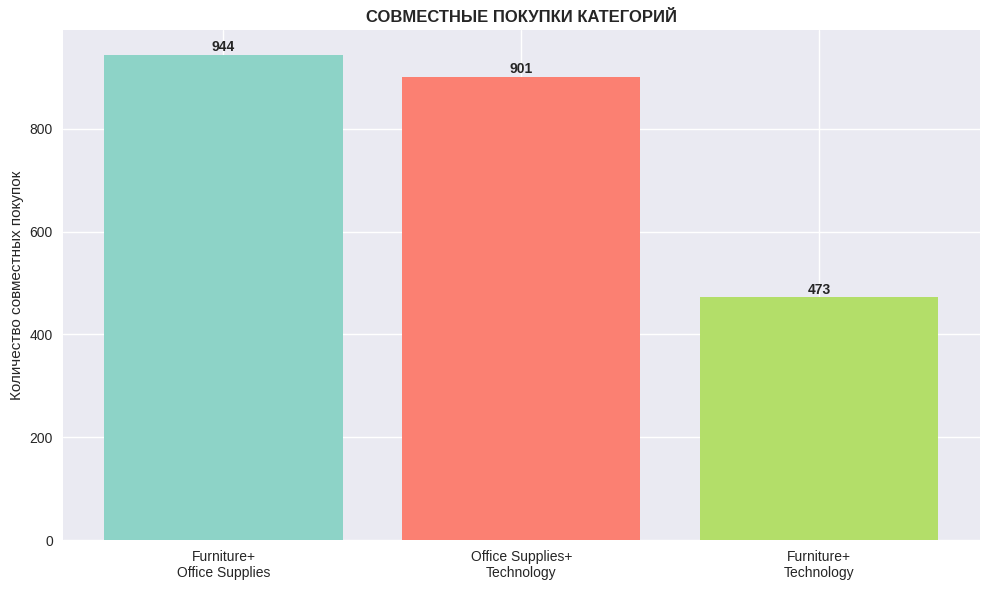

In [ ]:
def test_additional_hypotheses(df):
    print("ДОПОЛНИТЕЛЬНЫЕ ГИПОТЕЗЫ")

    # Гипотеза 5: Клиенты из малых городов более лояльны
    print("\nГИПОТЕЗА: КЛИЕНТЫ ИЗ МАЛЫХ ГОРОДОВ БОЛЕЕ ЛОЯЛЬНЫ")

    # Анализ лояльности по городам
    city_analysis = df.groupby('City').agg({
        'Customer_ID': 'nunique',
        'Order_ID': 'nunique',
        'Sales': 'sum'
    })

    city_analysis['Orders_per_Customer'] = city_analysis['Order_ID'] / city_analysis['Customer_ID']
    city_analysis['Avg_Order_Value'] = city_analysis['Sales'] / city_analysis['Order_ID']

    # Разделение городов по размеру (по количеству клиентов)
    small_cities = city_analysis[city_analysis['Customer_ID'] <= city_analysis['Customer_ID'].quantile(0.33)]
    large_cities = city_analysis[city_analysis['Customer_ID'] > city_analysis['Customer_ID'].quantile(0.67)]

    small_city_loyalty = small_cities['Orders_per_Customer'].mean()
    large_city_loyalty = large_cities['Orders_per_Customer'].mean()

    print(f"   • Среднее количество заказов на клиента:")
    print(f"     Малые города: {small_city_loyalty:.2f}")
    print(f"     Крупные города: {large_city_loyalty:.2f}")

    # Статистическая проверка
    from scipy import stats
    t_stat, p_value = stats.ttest_ind(small_cities['Orders_per_Customer'].dropna(),
                                     large_cities['Orders_per_Customer'].dropna())

    print(f"   • T-тест: t={t_stat:.3f}, p-value={p_value:.4f}")

    # Визуализация
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Лояльность по размеру города
    loyalty_data = [small_city_loyalty, large_city_loyalty]
    labels = ['Малые города', 'Крупные города']
    colors = ['#4ECDC4', '#FF6B6B']

    bars = ax1.bar(labels, loyalty_data, color=colors)
    ax1.set_title('ЛОЯЛЬНОСТЬ ПО РАЗМЕРУ ГОРОДА', fontweight='bold')
    ax1.set_ylabel('Заказов на клиента')

    for bar, value in zip(bars, loyalty_data):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

    # Диаграмма рассеивания
    ax2.scatter(city_analysis['Customer_ID'], city_analysis['Orders_per_Customer'],
               alpha=0.6, color='#2E86AB')
    ax2.set_xlabel('Количество клиентов в городе')
    ax2.set_ylabel('Заказов на клиента')
    ax2.set_title('📊 ЗАВИСИМОСТЬ: РАЗМЕР ГОРОДА vs ЛОЯЛЬНОСТЬ', fontweight='bold')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Гипотеза 6: Корреляция между категориями в корзине
    print("\nГИПОТЕЗА: ТОВАРЫ ИЗ OFFICE SUPPLIES ЧАСТО ПОКУПАЮТСЯ С TECHNOLOGY")

    # Анализ совместных покупок
    from itertools import combinations

    # Создаем матрицу совместных покупок
    order_categories = df.groupby('Order_ID')['Category'].unique()

    # Считаем пары категорий
    category_pairs = {}
    for categories in order_categories:
        if len(categories) > 1:
            for pair in combinations(sorted(categories), 2):
                category_pairs[pair] = category_pairs.get(pair, 0) + 1

    # Сортируем по частоте
    sorted_pairs = sorted(category_pairs.items(), key=lambda x: x[1], reverse=True)

    print("   • Топ-5 пар категорий в корзине:")
    for (cat1, cat2), count in sorted_pairs[:5]:
        print(f"     {cat1} + {cat2}: {count} раз")

    # Визуализация
    fig, ax = plt.subplots(figsize=(10, 6))

    pairs = [f"{cat1}+\n{cat2}" for (cat1, cat2), _ in sorted_pairs[:5]]
    counts = [count for _, count in sorted_pairs[:5]]

    bars = ax.bar(pairs, counts, color=plt.cm.Set3(np.linspace(0, 1, 5)))
    ax.set_title('СОВМЕСТНЫЕ ПОКУПКИ КАТЕГОРИЙ', fontweight='bold')
    ax.set_ylabel('Количество совместных покупок')

    for bar, count in zip(bars, counts):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{count}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    return {
        'small_city_loyalty': small_city_loyalty,
        'large_city_loyalty': large_city_loyalty,
        'city_loyalty_p_value': p_value,
        'top_category_pair': sorted_pairs[0] if sorted_pairs else None
    }

# Запуск дополнительных гипотез
additional_results = test_additional_hypotheses(df_clean)